In [7]:
#DSC 540
#Predictive Analysis and Early Detection of Chronic Kidney Disease
#Group 2 Members: Sena Bui, Johnathen Kent, Shria Narapaneni, Charlotte Anderson

In [8]:
# Charlotte: Preprocessing 

In [9]:
!pip install --upgrade scikit-learn==1.3.2
!pip install --upgrade imbalanced-learn==0.11.0

In [10]:
import pkg_resources
import sys
if 'parse_version' not in dir(sys.modules.get('sklearn.utils', {})):
    import sklearn.utils
    sklearn.utils.parse_version = pkg_resources.parse_version

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
df=pd.read_csv("/Users/Charlotte/Downloads/Chronic_Kidney_Dsease_data.csv") 
# Replace with your location
pd.set_option("display.max_columns", None)

In [13]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [14]:
df.shape

(1659, 54)

In [15]:
df.drop("DoctorInCharge", axis=1, inplace=True)

In [16]:
#Removed Doctor in charge as it is not necessary for the ML project and it is confidential for HIPPA as well

In [17]:
#Continue to explore null values: 

In [18]:
df.isna().sum()

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCal

In [19]:
#there are 0 null values in every varaible 

In [20]:
print("Summary Statistics of Numerical Columns:")
print(df.describe()) 

Summary Statistics of Numerical Columns:
         PatientID          Age       Gender   Ethnicity  SocioeconomicStatus  \
count  1659.000000  1659.000000  1659.000000  1659.00000          1659.000000   
mean    830.000000    54.441230     0.515371     0.71308             0.977697   
std     479.056364    20.549757     0.499914     1.00043             0.776686   
min       1.000000    20.000000     0.000000     0.00000             0.000000   
25%     415.500000    36.000000     0.000000     0.00000             0.000000   
50%     830.000000    54.000000     1.000000     0.00000             1.000000   
75%    1244.500000    72.000000     1.000000     1.00000             2.000000   
max    1659.000000    90.000000     1.000000     3.00000             2.000000   

       EducationLevel          BMI      Smoking  AlcoholConsumption  \
count     1659.000000  1659.000000  1659.000000         1659.000000   
mean         1.693189    27.620049     0.292948            9.969831   
std          0.9

In [21]:
v= [i for i in df.columns if df[i].nunique() < 5]
b= [i for i in df.columns if i not in v]

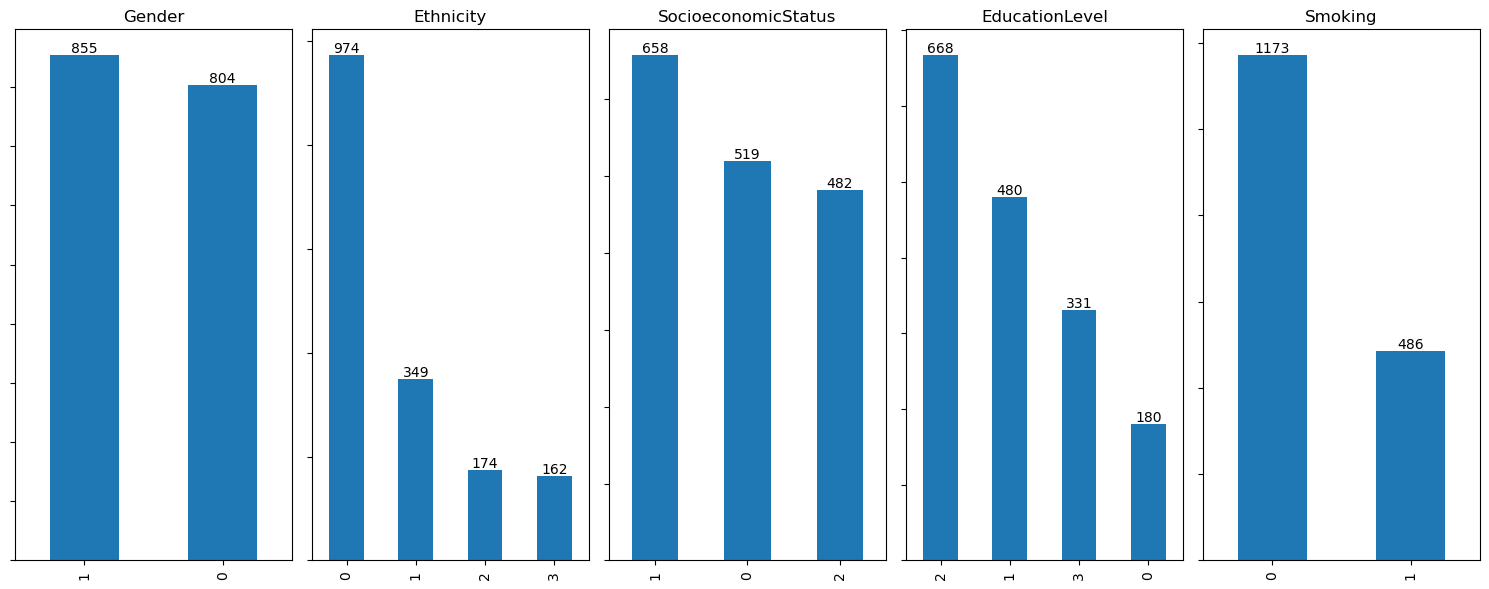

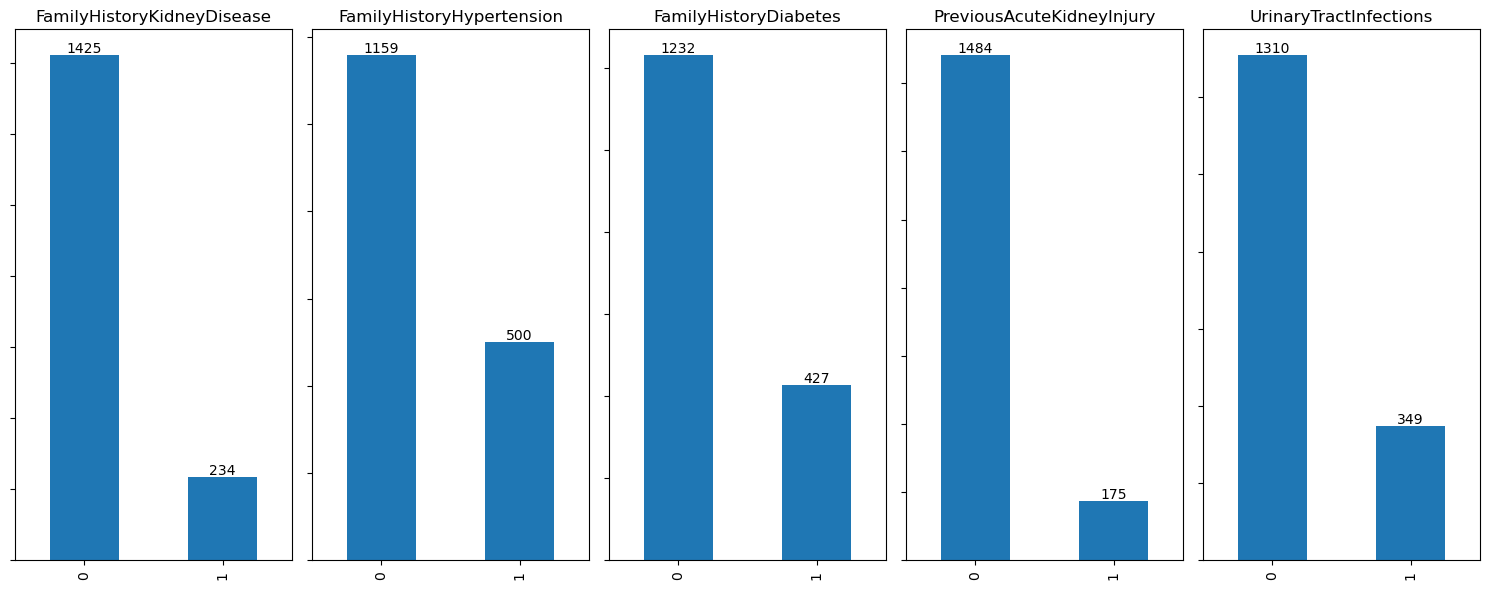

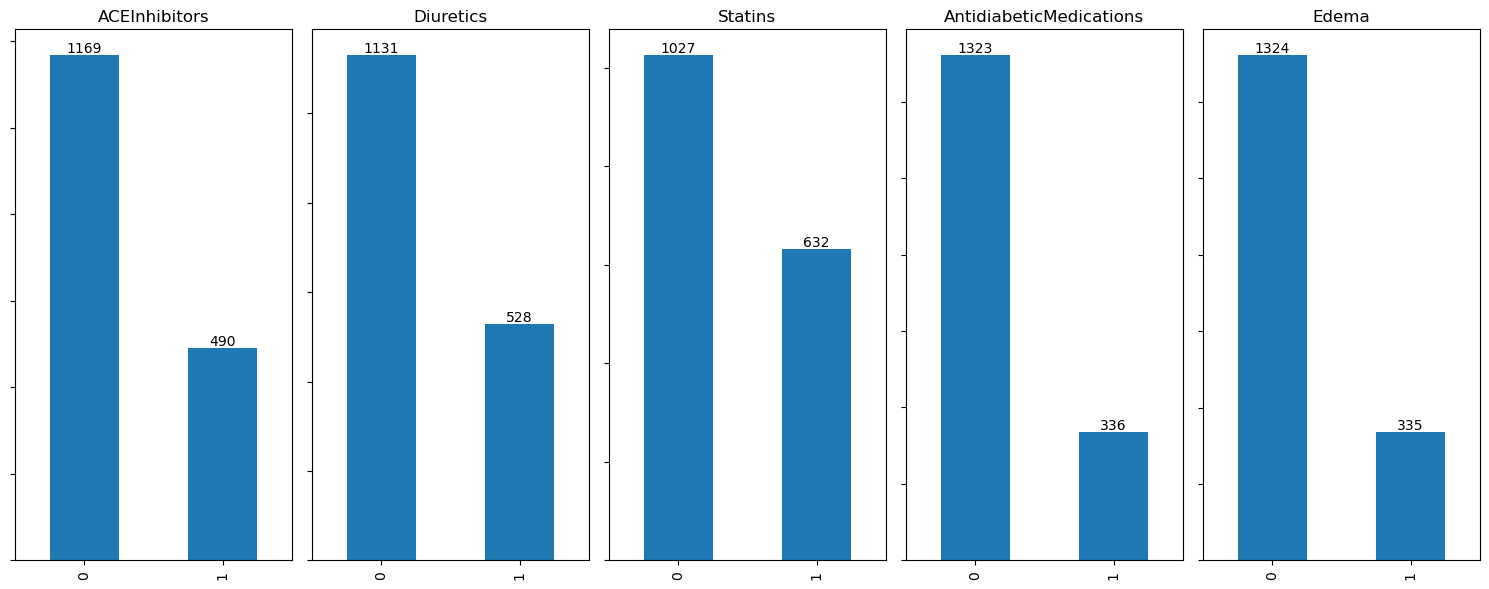

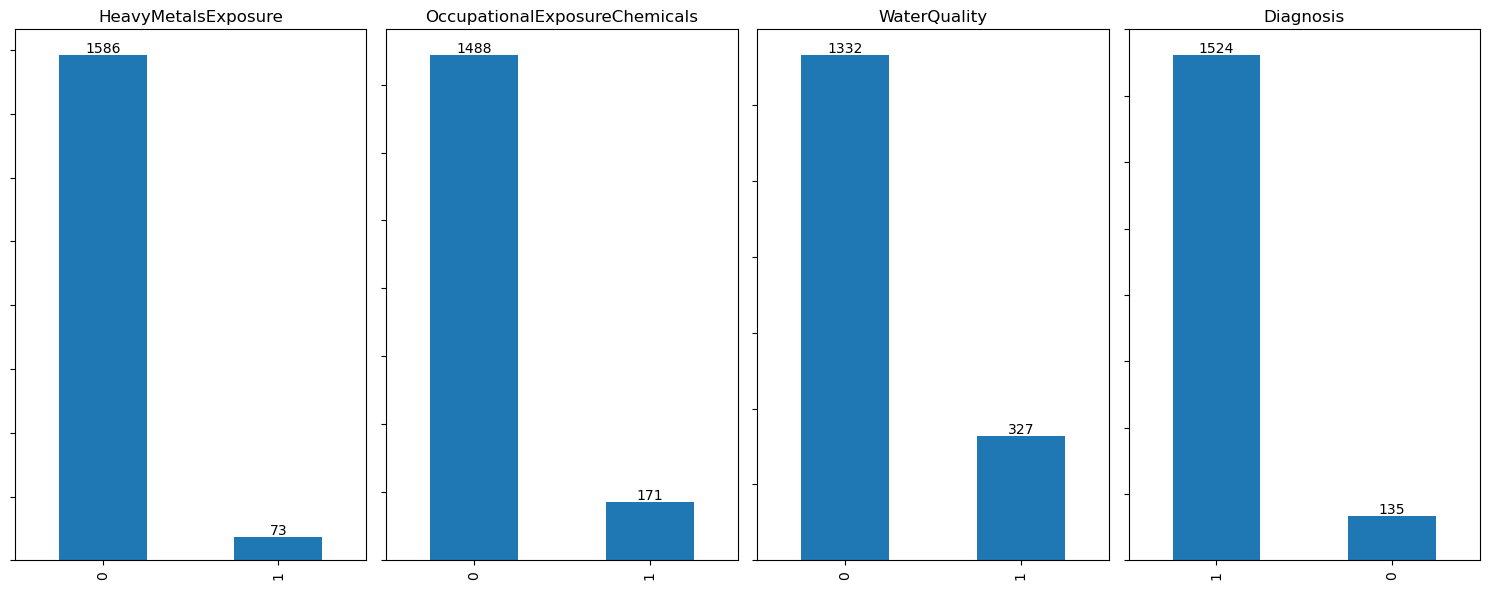

In [22]:
index = 0
for i in range(3):
    fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
    for j in range(5):
        count= df[v[index]].value_counts()
        count.plot(kind="bar", ax=axes[j])
        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_yticklabels(())
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        axes[j].set_title(v[index])
        index += 1
    plt.tight_layout()
    plt.show()
fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
for j in range(4):
    count= df[v[index]].value_counts()
    count.plot(kind="bar", ax=axes[j])
    for container in axes[j].containers:
        axes[j].bar_label(container)
    axes[j].set_yticklabels(())
    axes[j].set_ylabel("")
    axes[j].set_xlabel("")
    axes[j].set_title(v[index])
    index += 1
plt.tight_layout()
plt.show()

In [23]:
#create a correlation matrix to see which varaibles to use in the ML

In [24]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
PatientID,1.000000,0.001166,-0.023822,-0.016970,0.025289,0.029565,-0.036264,-0.005863,0.029087,-0.003768,0.017805,-0.027967,0.002202,-0.000886,0.004744,-0.002172,-0.038688,-0.056561,-0.003990,0.031931,0.016660,-0.022185,-0.006452,0.014405,0.024432,-0.001301,-0.015218,-0.004618,-0.033282,0.020958,0.015896,-0.020683,0.041464,-0.007586,0.033592,-0.003291,-0.012003,0.013110,-0.017152,0.008315,-0.059655,-0.010984,-0.019741,0.003806,-0.042814,-0.011147,-0.028480,0.002591,0.028288,-0.018654,0.001955,0.004524,-0.171405
Age,0.001166,1.000000,-0.037765,-0.006307,0.001448,0.008947,-0.033202,0.020215,-0.006030,0.003485,0.004062,-0.005151,0.014984,-0.008672,0.001114,0.028253,0.042979,0.050918,0.007282,-0.006815,0.026093,-0.019612,-0.041336,0.045831,-0.021659,-0.032800,0.004838,-0.003220,0.028401,-0.039311,0.011719,-0.023106,0.001591,-0.015607,-0.021061,-0.001364,0.004348,0.019042,0.000734,-0.015058,-0.016797,0.002977,-0.029556,0.001318,0.005683,-0.022676,0.043746,-0.014711,-0.038522,-0.015165,0.043168,0.010920,0.000919
Gender,-0.023822,-0.037765,1.000000,0.025707,0.004767,-0.022095,-0.023381,0.004054,-0.020473,0.014840,0.011517,-0.004312,0.032584,-0.007058,0.019137,0.038519,0.021116,0.031253,0.027322,-0.006086,0.003495,0.010221,-0.012786,0.030294,0.012642,-0.017650,0.018728,0.026549,0.009740,-0.018112,0.006620,0.037077,0.012775,0.033222,-0.034570,0.011813,0.061844,-0.003433,-0.004258,0.026516,0.013072,-0.003961,0.000570,-0.028158,0.001424,0.015554,0.013984,-0.000509,0.019628,0.020156,-0.026356,-0.014644,0.042239
Ethnicity,-0.016970,-0.006307,0.025707,1.000000,-0.047051,0.039696,-0.008506,0.019127,-0.033574,-0.057811,-0.012721,0.029833,0.010630,-0.021725,0.007602,0.025920,-0.024939,-0.017903,0.016126,0.038599,0.050558,-0.019571,0.023219,0.004514,-0.005262,-0.034707,-0.000465,0.008823,-0.010712,0.004365,-0.021487,0.050441,-0.014540,0.012009,-0.007313,0.028524,-0.029121,0.048621,0.000414,0.018603,-0.022343,-0.060223,0.013447,-0.004542,-0.031039,0.010930,0.008654,0.010036,-0.036629,0.023191,0.007489,0.012971,0.007199
SocioeconomicStatus,0.025289,0.001448,0.004767,-0.047051,1.000000,-0.003711,-0.030242,0.021900,0.010864,-0.000259,-0.000394,-0.019183,-0.041888,-0.004820,0.054200,0.030082,-0.008031,-0.023491,0.019670,-0.045426,0.000801,-0.017501,0.045003,0.016207,0.001996,0.003091,-0.020260,-0.020116,-0.035272,-0.026572,-0.010521,-0.062895,0.050025,-0.015586,-0.033922,-0.023946,-0.067039,0.017293,0.008145,-0.006773,-0.026162,-0.015654,0.002195,-0.026640,-0.003762,-0.007924,0.036443,-0.013242,-0.005283,0.002820,0.009689,-0.022453,-0.034104
EducationLevel,0.029565,0.008947,-0.022095,0.039696,-0.003711,1.000000,-0.016669,0.003070,0.046814,-0.003066,-0.013261,-0.003333,-0.015611,-0.028275,-0.012103,0.029514,-0.012872,0.014516,-0.006849,0.013999,0.010064,-0.006992,-0.021090,0.027940,-0.005571,-0.004994,0.011247,-0.006916,-0.000648,-0.037646,0.024930,-0.044451,-0.012215,0.001961,-0.015520,0.026615,0.004259,0.013555,-0.002857,-0.027863,0.009537,-0.014135,-0.021006,0.018786,0.004209,-0.016503,-0.047143,0.020611,-0.029415,0.022940,-0.005434,-0.000944,-0.037343
BMI,-0.036264,-0.033202,-0.023381,-0.008506,-0.030242,-0.016669,1.000000,-0.000968,-0

In [25]:
# the lighter blue shows weaker correlations and the darker blues have a higher correlation. 
# Based off this anaysis above the key features include:

- Demographic Variables: The analysis includes patient identifiers, age, gender, ethnicity, socioeconomic status, education level, BMI, and lifestyle factors (smoking, alcohol consumption, physical activity, diet and sleep quality).
- Medical History: Family history variables for kidney disease, hypertension, and diabetes, along with previous acute kidney injury and urinary tract infections.
- Clinical Measurements:Blood pressure (systolic and diastolic), Blood tests (fasting blood sugar, HbA1c, serum creatinine), Kidney function markers (BUN levels, GFR, protein in urine, ACR), Electrolytes (sodium, potassium, calcium, phosphorus), Blood components (hemoglobin), Lipid profile (total cholesterol, LDL, HDL, triglycerides)
- Medications: ACE inhibitors, diuretics, NSAIDs, statins, and antidiabetic medications
- Symptoms and Quality of Life: Edema, fatigue, nausea/vomiting, muscle cramps, itching, and quality of life score
- Environmental Factors: Heavy metals exposure, occupational chemical exposure, and water quality
- Healthcare Utilization: Medical checkup frequency, medication adherence, and health literacy
- Outcome: Diagnosis which is the target varaible 

There is a stronger negative correlation between diagnosis and patient ID(-0.171405), which could suggest potential patterns in how patients are diagnosed based on their identifiers or intake order which is very intereting.

PatientID was selected which may undicated a potential issue with the data. Considering this it will be removed for future use

In [26]:
df = df.drop('PatientID', axis=1)

In [27]:
#which varaibles affect diagrnosis outcomes:

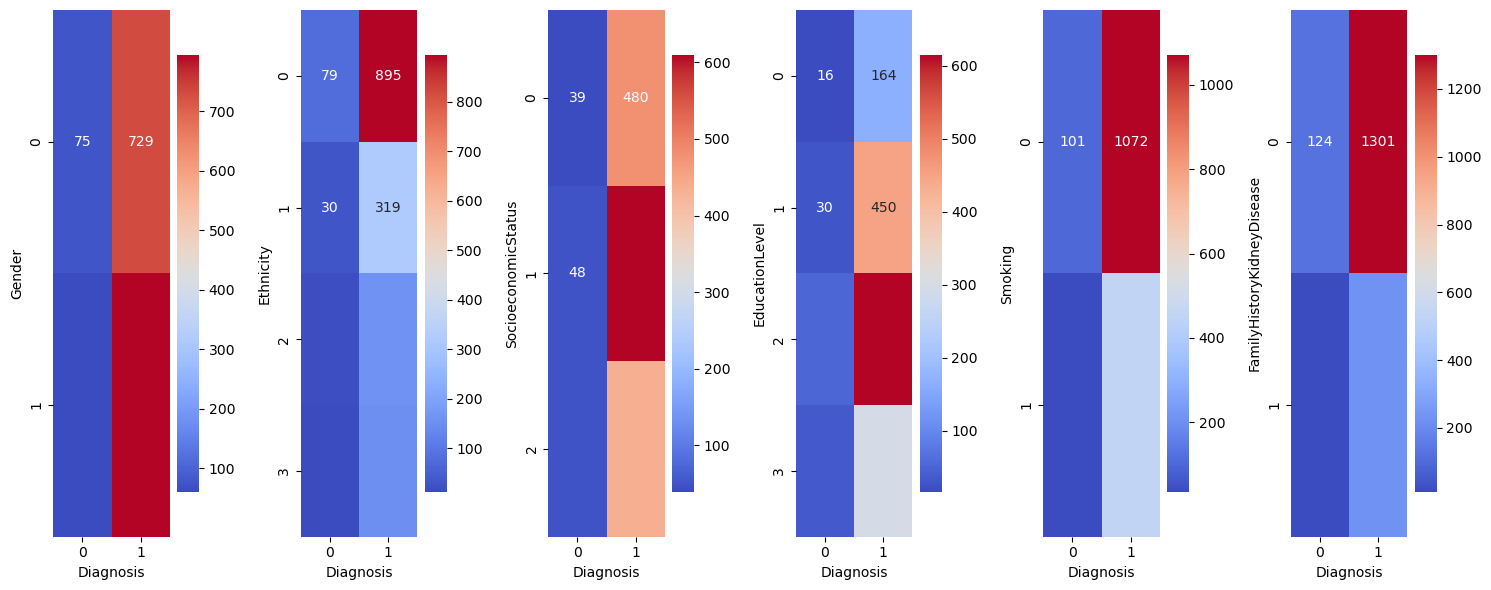

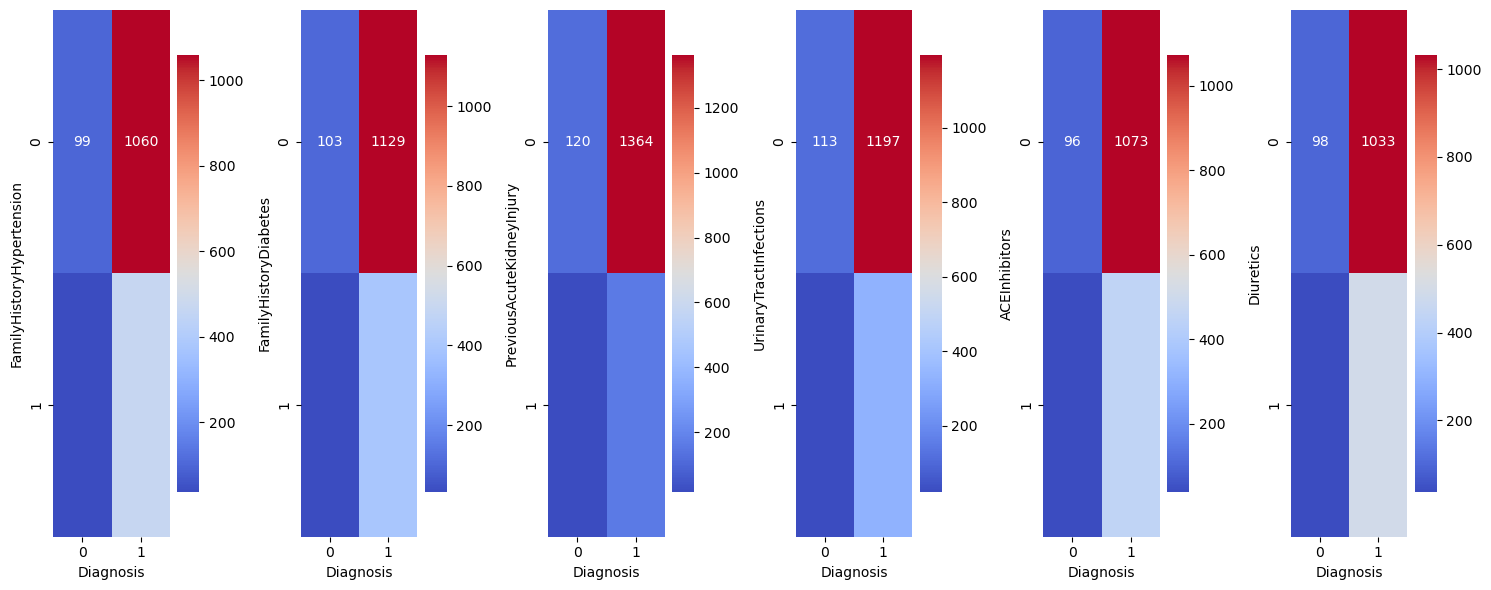

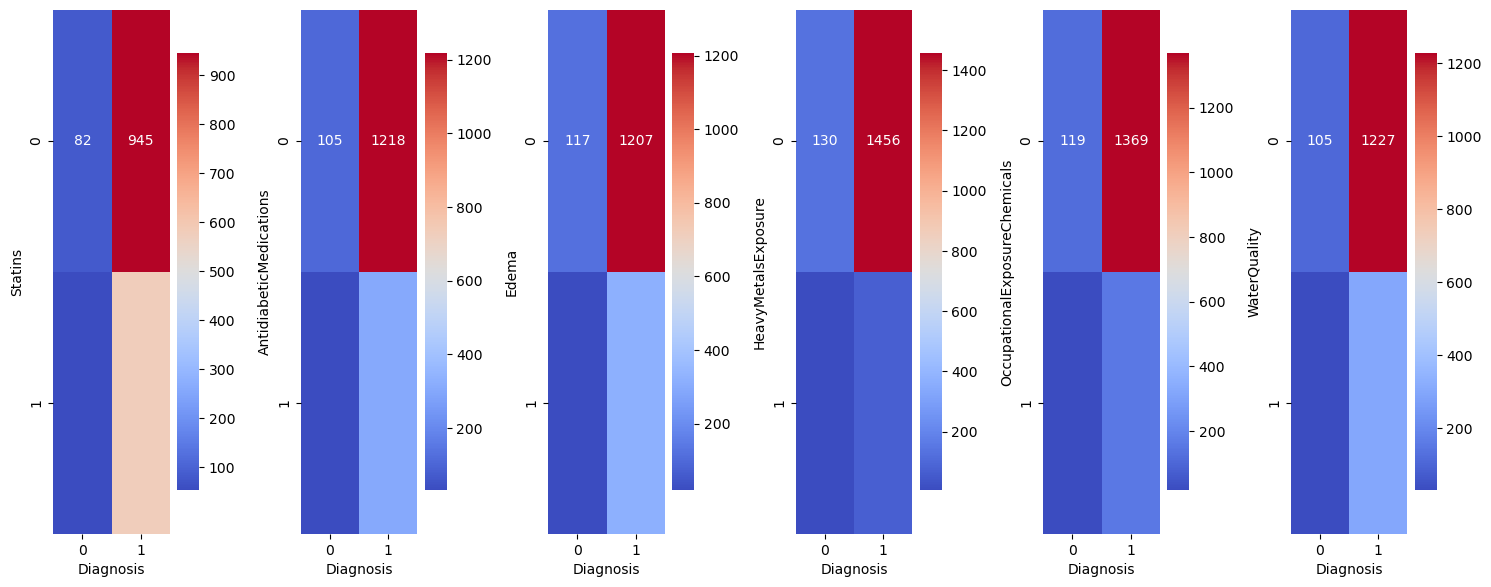

In [28]:
index = 0
for i in range(3):
    fig, axes = plt.subplots(ncols=6, figsize=(15, 6))
    for j in range(6):
        sns.heatmap(pd.crosstab(df[v[index]], df[v[-1]]), annot=True, fmt='d', cmap="coolwarm", ax=axes[j])
        index += 1
    plt.tight_layout()
    plt.show()

In [29]:
# the key is showing how many time each of the varaibles occurs with the diagnosis varaible

Class Distribution:
Diagnosis
1    91.862568
0     8.137432
Name: proportion, dtype: float64


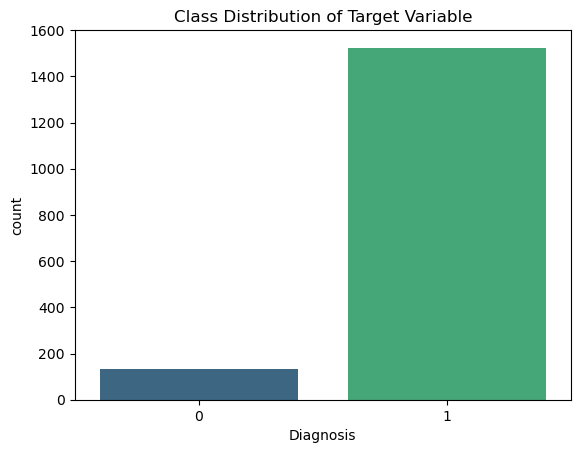

In [30]:
# Class distribution of the target variable
print("Class Distribution:")
print(df[v[-1]].value_counts(normalize=True) * 100)  # Percentage format
sns.countplot(x=df[v[-1]], palette="viridis")
plt.title("Class Distribution of Target Variable")
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119:

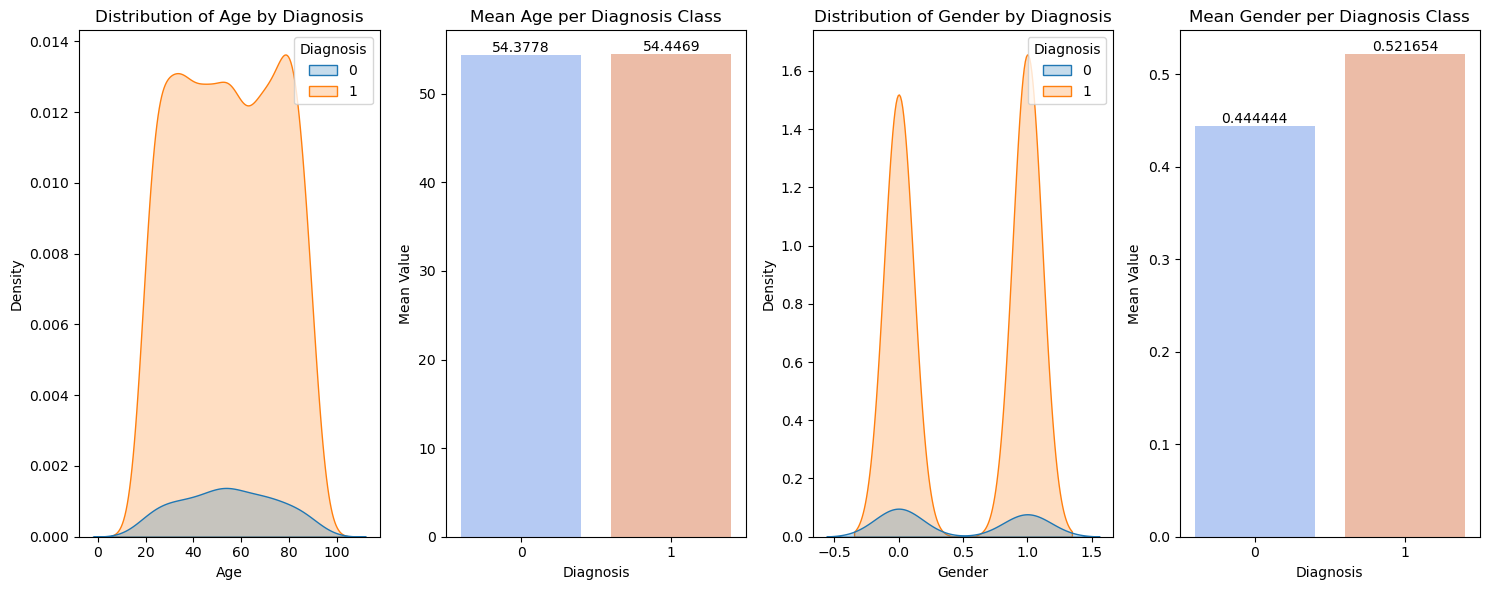

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119:

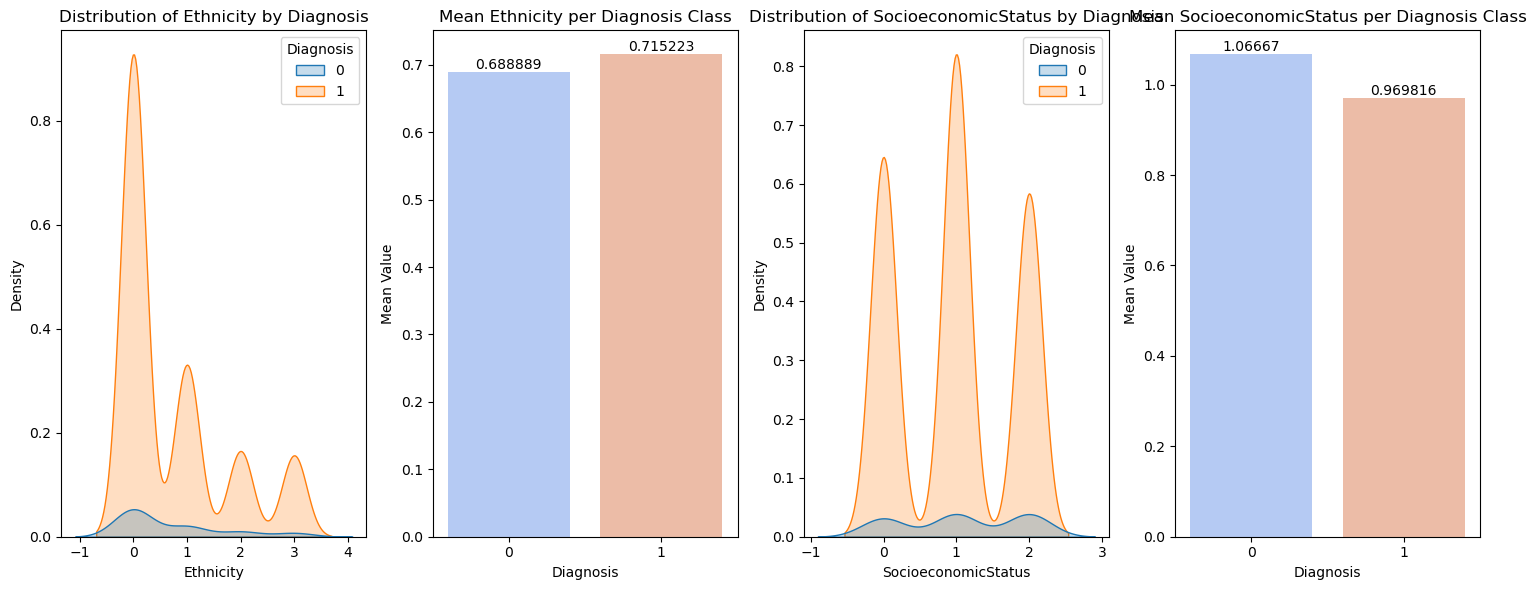

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119:

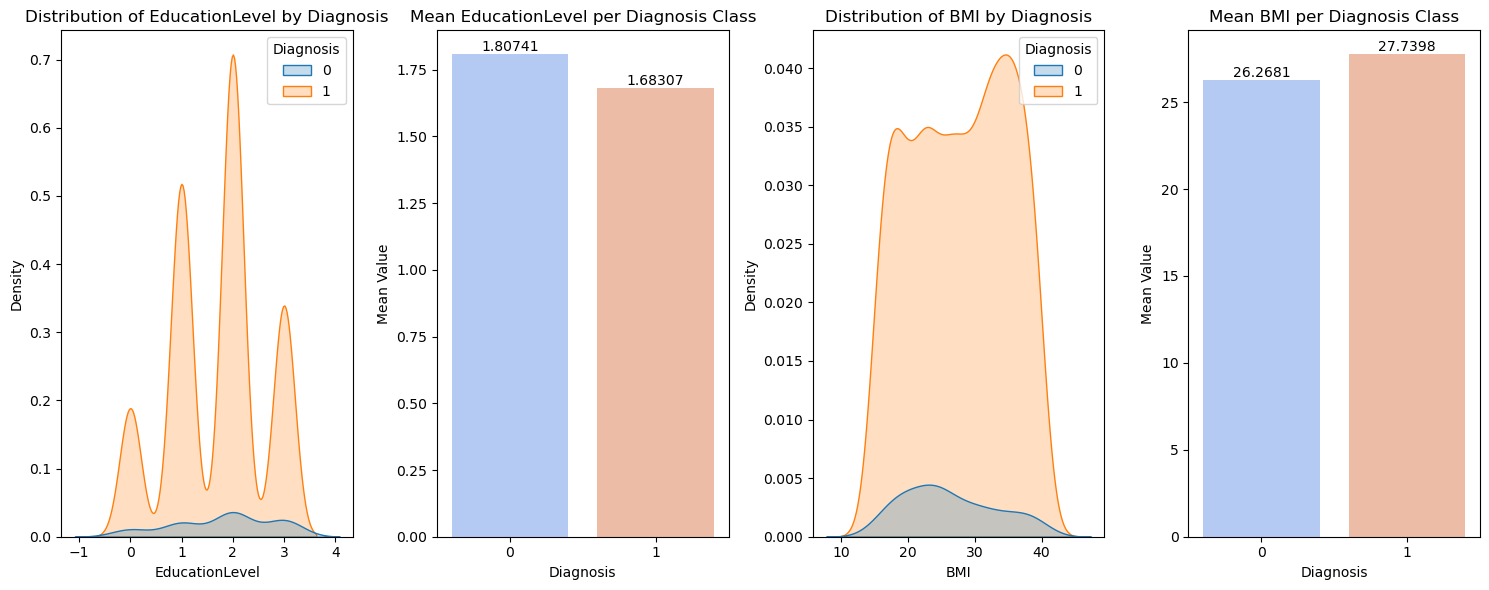

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119:

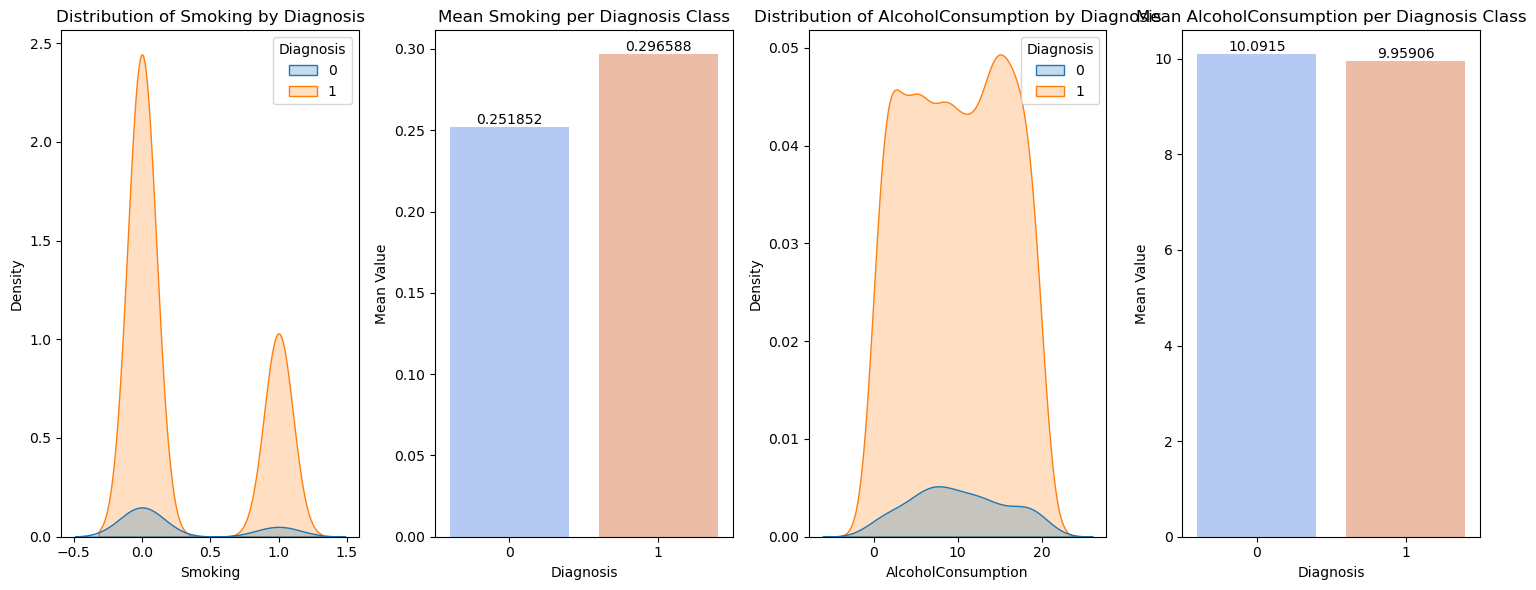

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

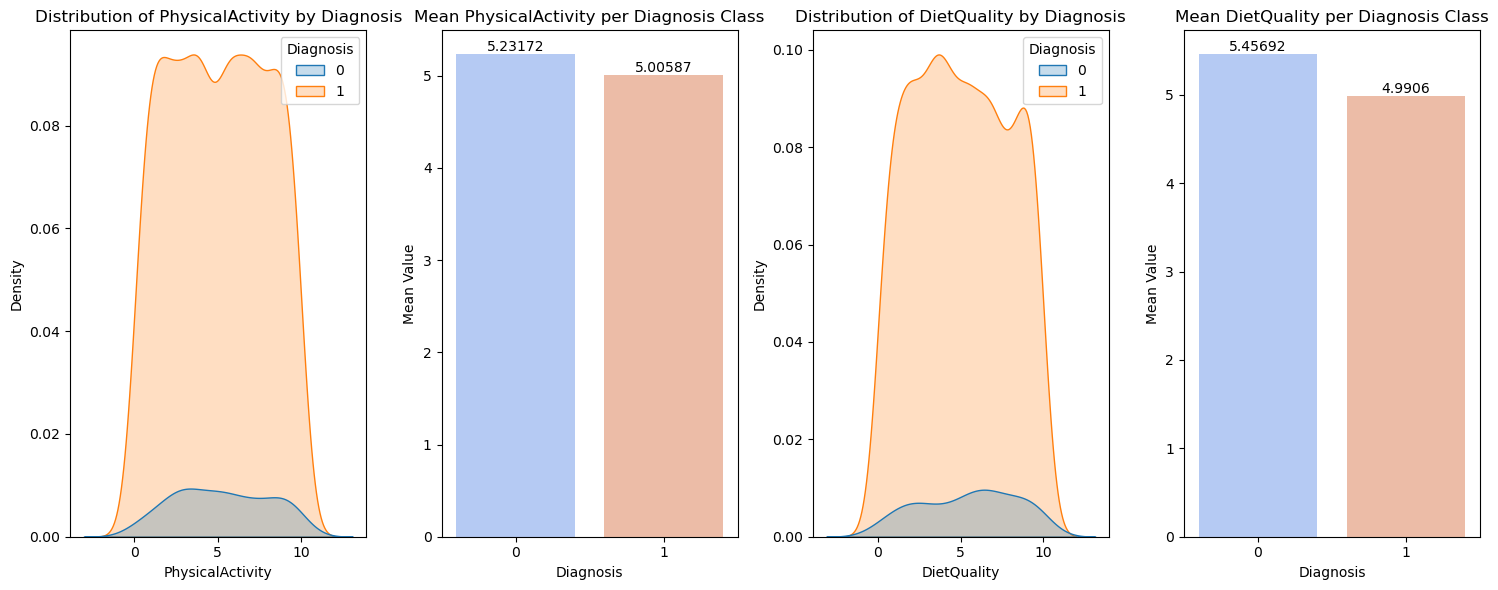

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

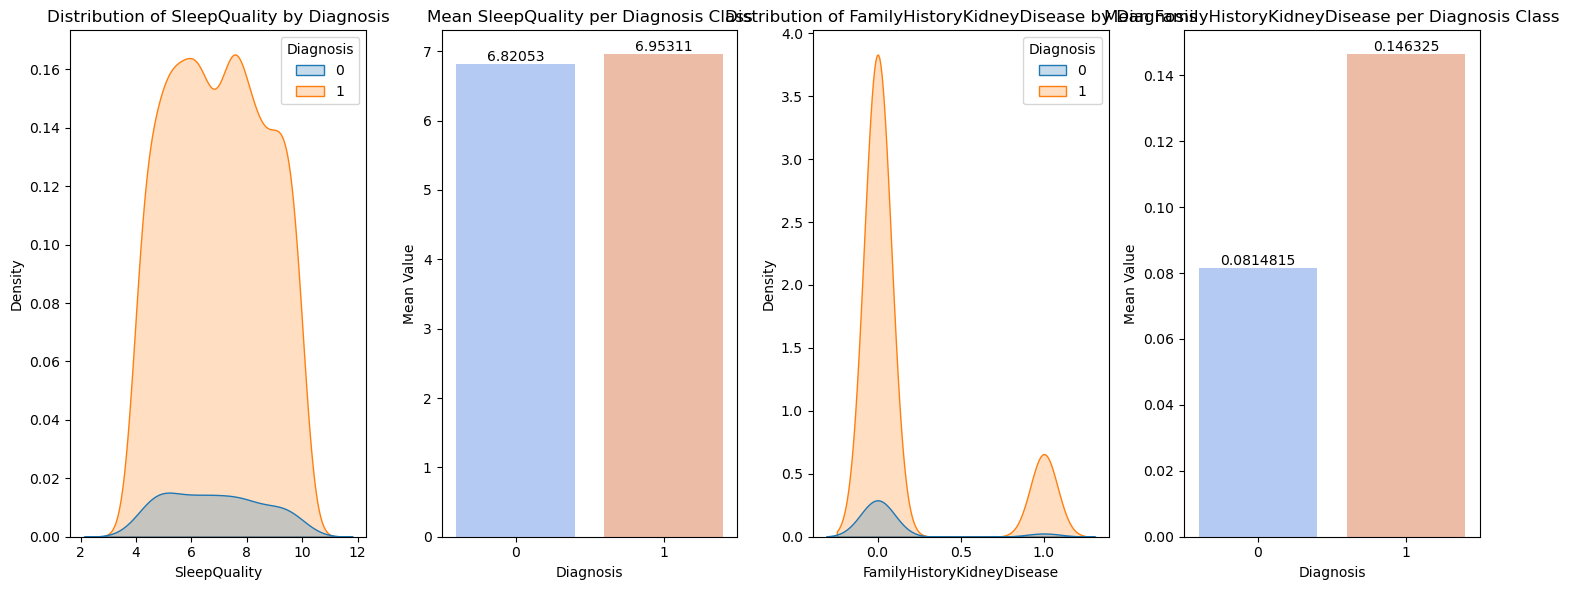

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119:

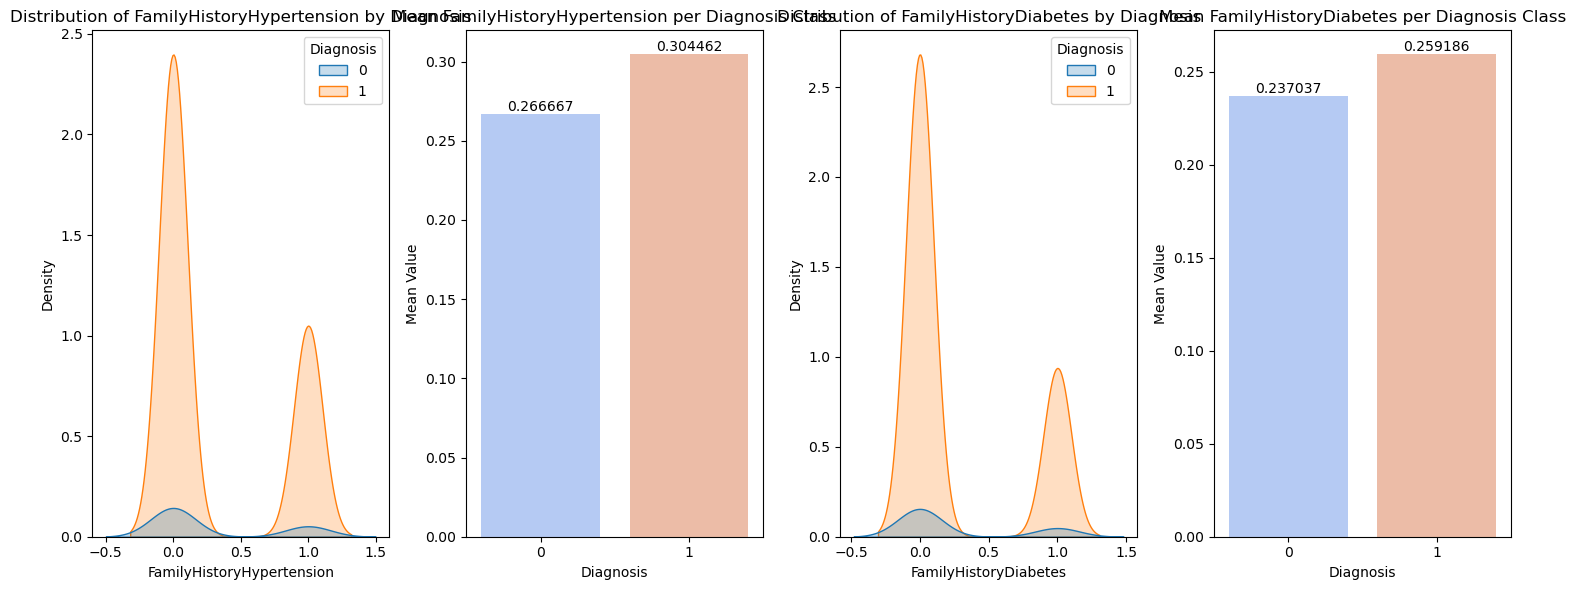

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119:

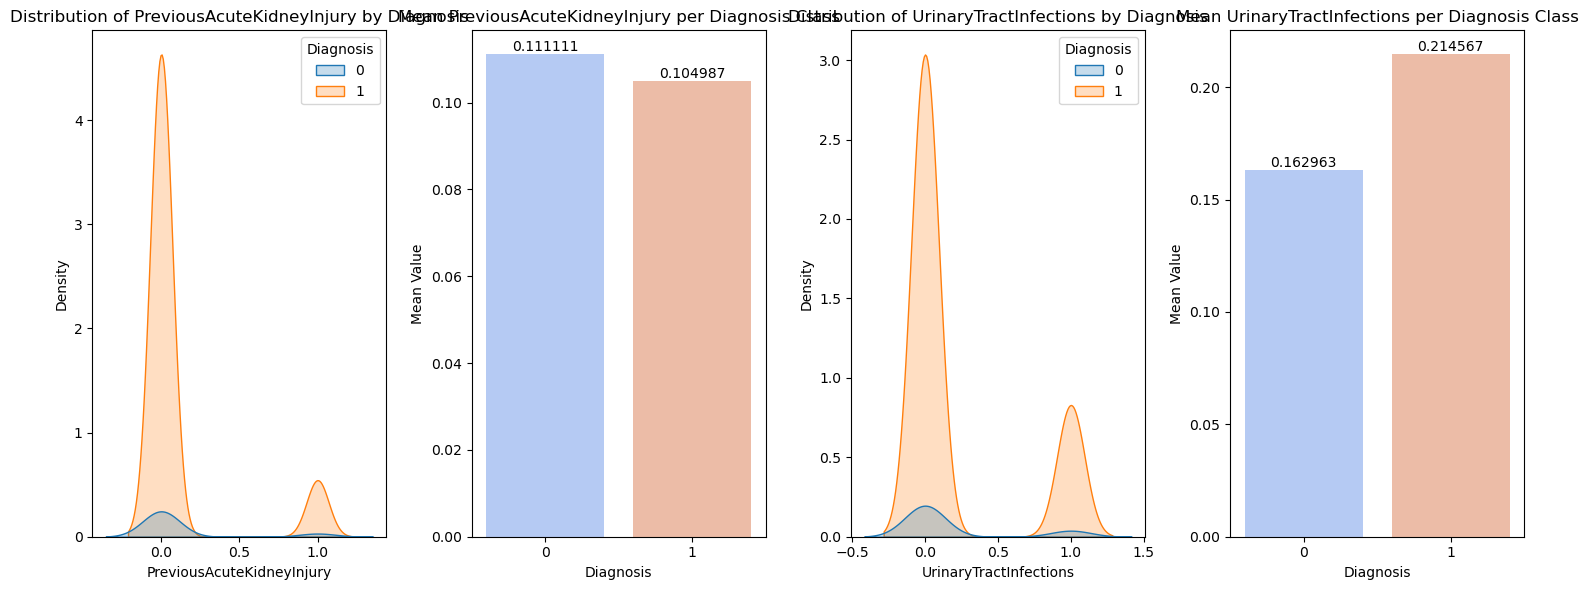

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119:

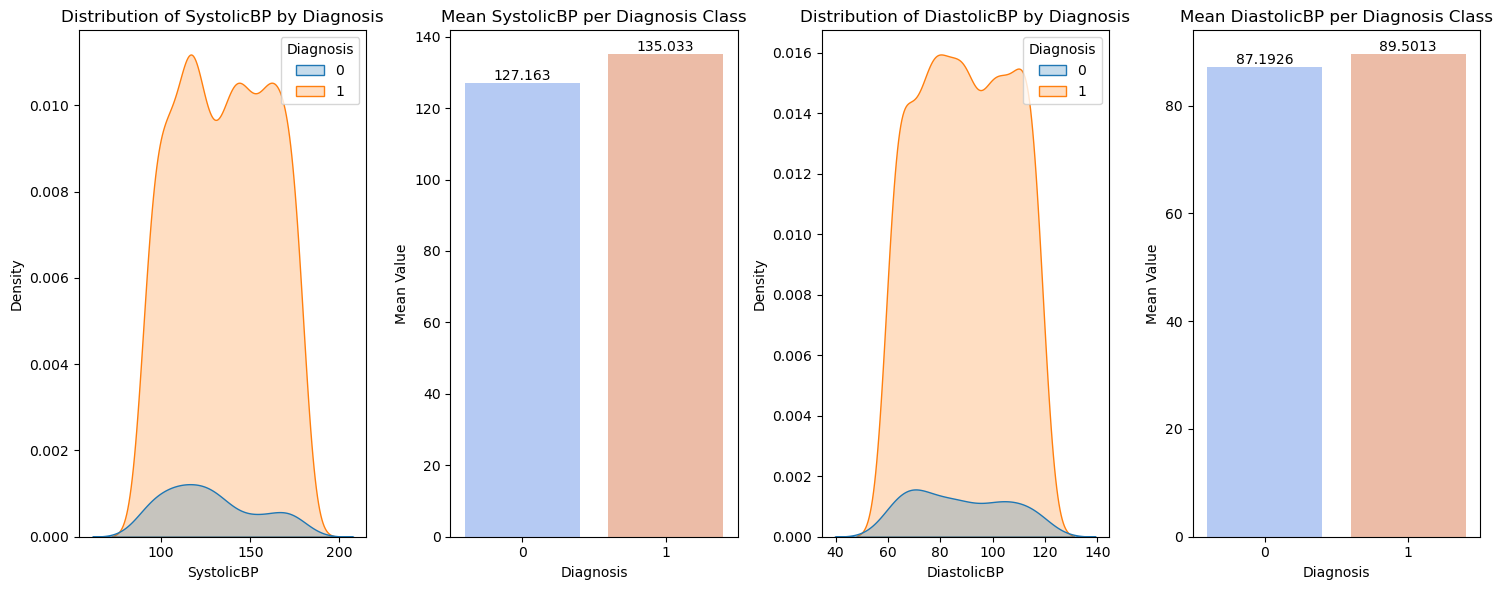

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

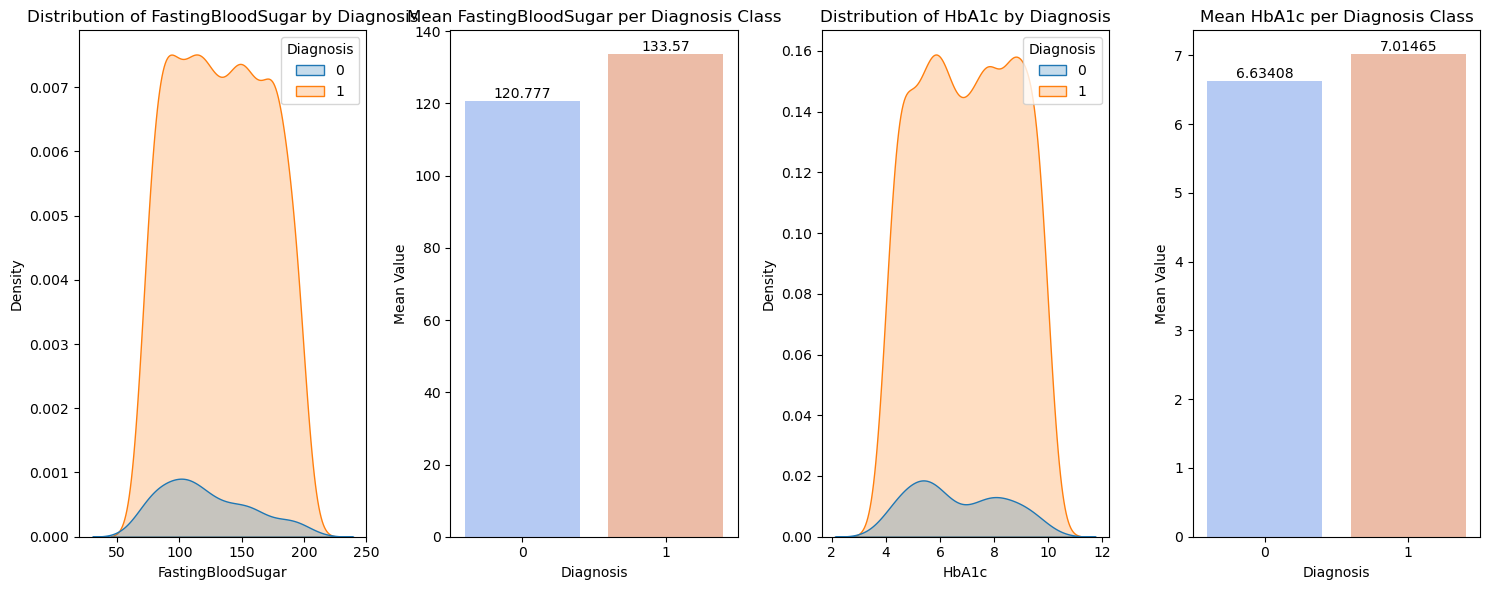

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

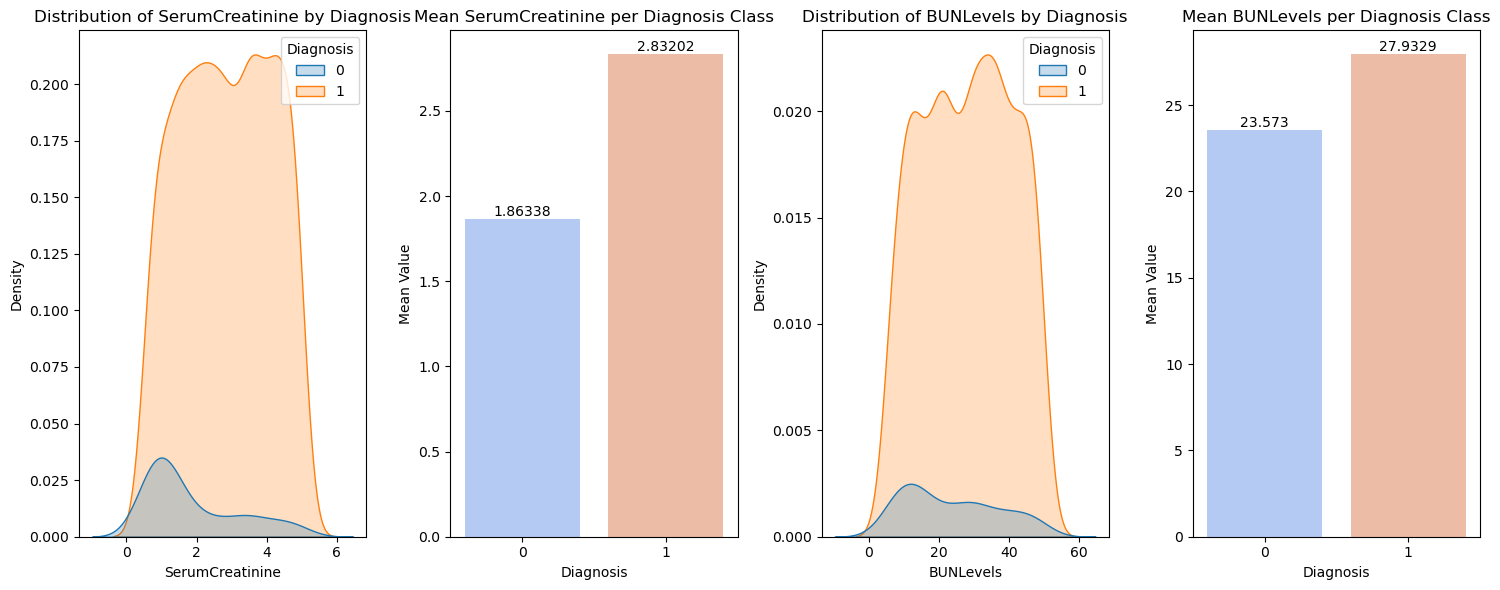

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

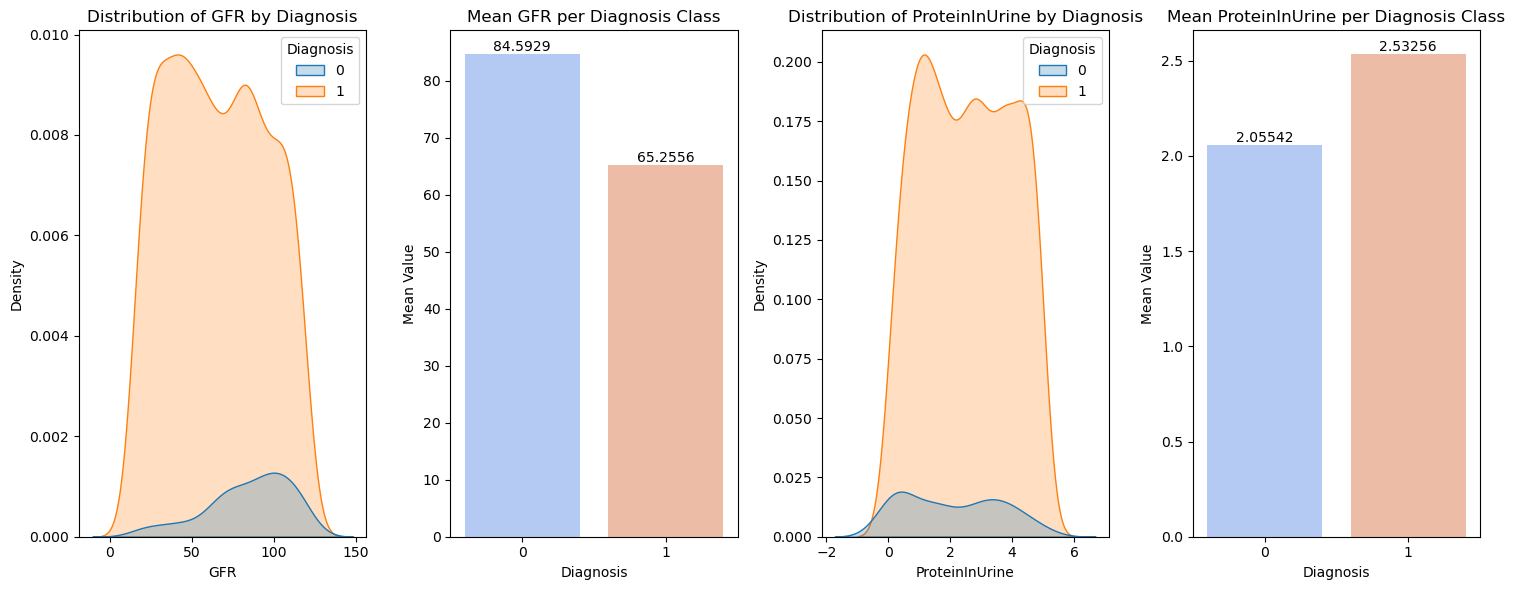

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

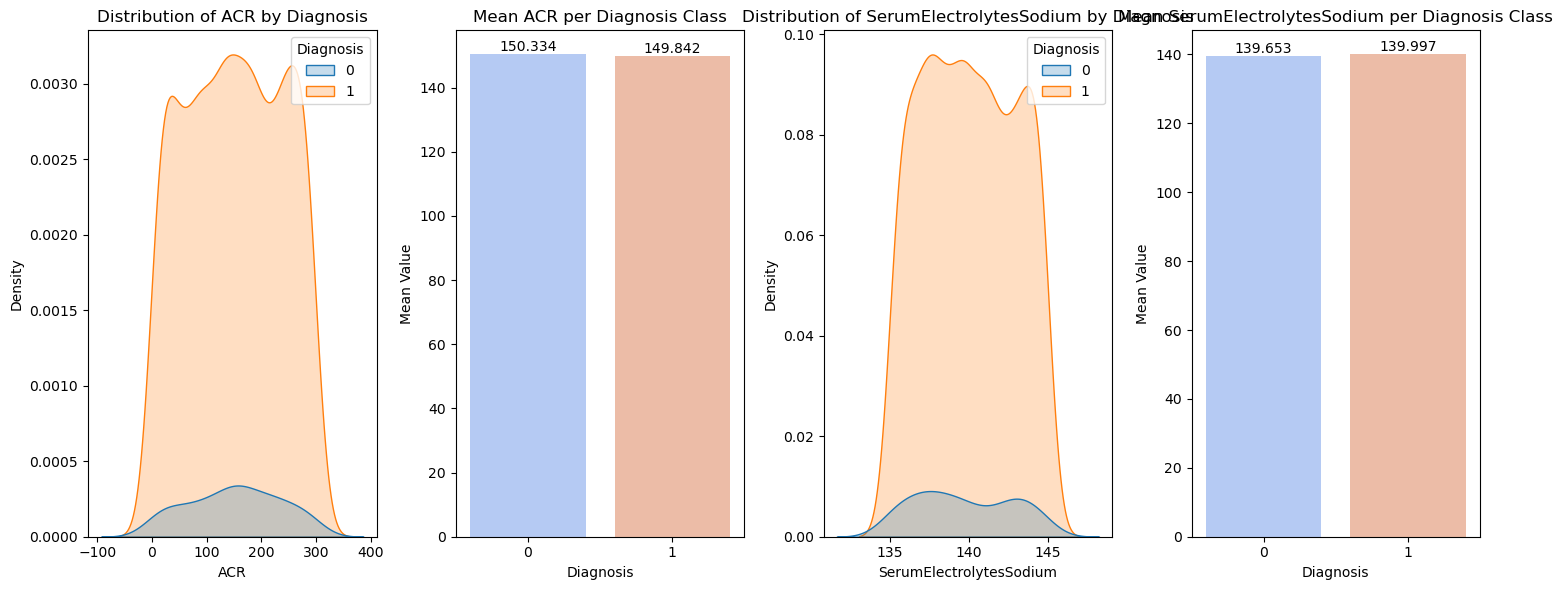

In [31]:
grouped = df.groupby("Diagnosis")
index = 0
nums = df.select_dtypes(include=["number"]).columns.tolist()
if "Diagnosis" in nums:
    nums.remove("Diagnosis")
nf = len(nums)
np = (nf + 3) // 4  
for i in range(np):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for j in range(0, 4, 2):
        if index >= nf:
            break  
        sns.kdeplot(data=df, x=nums[index], hue="Diagnosis", ax=axes[j], fill=True)
        axes[j].set_xlabel(nums[index])
        axes[j].set_ylabel("Density")
        axes[j].set_title(f"Distribution of {nums[index]} by Diagnosis")
        mean_values = grouped[nums[index]].mean()
        sns.barplot(x=mean_values.index, y=mean_values, ax=axes[j+1], palette="coolwarm")
        for container in axes[j+1].containers:
            axes[j+1].bar_label(container)
        axes[j+1].set_ylabel("Mean Value")
        axes[j+1].set_xlabel("Diagnosis")
        axes[j+1].set_title(f"Mean {nums[index]} per Diagnosis Class")
        index += 1 
    plt.tight_layout()
    plt.show()

In [32]:
#copy df and add for understanding 
def ef(df):
    df_eng = df.copy()
    if 'GFR' not in df.columns and all(col in df.columns for col in ['SerumCreatinine', 'Age', 'Gender']):
        gender_factor = (df_eng['Gender'] == 1).astype(int) * 0.85 + 0.15
        df_eng['eGFR_calculated'] = 175 * (df_eng['SerumCreatinine'] ** -1.154) * (df_eng['Age'] ** -0.203) * gender_factor
    if 'BMI' in df.columns: #BMI Categories based off medical journals
        bins = [0, 18.5, 25, 30, 100]
        labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
        df_eng['BMI_Category'] = pd.cut(df_eng['BMI'], bins=bins, labels=labels)
    # CKD stages
    if 'GFR' in df.columns:
        bins = [0, 15, 30, 45, 60, 90, 1000]
        labels = ['Stage 5', 'Stage 4', 'Stage 3B', 'Stage 3A', 'Stage 2', 'Stage 1']
        df_eng['CKD_Stage'] = pd.cut(df_eng['GFR'], bins=bins, labels=labels)
    if all(col in df.columns for col in ['Age', 'SerumCreatinine']):
        df_eng['Age_Creatinine'] = df_eng['Age'] * df_eng['SerumCreatinine']
    if all(col in df.columns for col in ['Smoking', 'BMI']):
        df_eng['Smoking_BMI'] = df_eng['Smoking'] * df_eng['BMI']
    if all(col in df.columns for col in ['SystolicBP', 'DiastolicBP']):
        df_eng['Pulse_Pressure'] = df_eng['SystolicBP'] - df_eng['DiastolicBP']
        df_eng['Mean_Arterial_Pressure'] = df_eng['DiastolicBP'] + (df_eng['Pulse_Pressure'] / 3)
    risk_factors = ['FamilyHistoryKidneyDisease', 'Smoking', 'FamilyHistoryDiabetes', 
                   'FamilyHistoryHypertension', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections']
    risk_factors_present = [col for col in risk_factors if col in df.columns]
    if risk_factors_present:
        df_eng['Risk_Score'] = df_eng[risk_factors_present].sum(axis=1)
    return df_eng

In [33]:
#handle outliers in the new df 
def ho(df, cols_to_check=None):
    df_clean = df.copy()
    if cols_to_check is None:
        cols_to_check = df.select_dtypes(include=['float64', 'int64']).columns
    for col in cols_to_check:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
            df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
    return df_clean

In [34]:
def sf(X, y, method='correlation', k=15):
    if method == 'correlation':
        if not isinstance(y, pd.Series):
            y = pd.Series(y, name='target')
        elif y.name is None:
            y = y.copy()
            y.name = 'target'
        correlations = {}
        for col in X.columns:
            corr_value = abs(X[col].corr(y))
            correlations[col] = corr_value
        corr_df = pd.DataFrame(list(correlations.items()), 
                              columns=['feature', 'correlation'])
        corr_df = corr_df.set_index('feature')
        selected_features = corr_df.sort_values('correlation', 
                                              ascending=False).head(k).index.tolist()
    elif method == 'selectkbest':
        selector = SelectKBest(f_classif, k=k)
        selector.fit(X, y)
        selected_features = X.columns[selector.get_support()].tolist()
    elif method == 'rfe':
        estimator = RandomForestClassifier(random_state=42)
        selector = RFE(estimator, n_features_to_select=k)
        selector.fit(X, y)
        selected_features = X.columns[selector.get_support()].tolist()
    return selected_features

/var/folders/7t/fp4g29fn5xd6sstn77ghtd880000gp/T/ipykernel_41898/2847052132.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
/var/folders/7t/fp4g29fn5xd6sstn77ghtd880000gp/T/ipykernel_41898/2847052132.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
/var/folders/7t/fp4g29fn5xd6sstn77ghtd880000gp/T/ipykernel_41898/2847052132.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please expl


Selected 15 features: ['SerumCreatinine', 'GFR', 'Age_Creatinine', 'CKD_Stage_Stage 1', 'Itching', 'FastingBloodSugar', 'MuscleCramps', 'BUNLevels', 'ProteinInUrine', 'CKD_Stage_Stage 4', 'CKD_Stage_Stage 3A', 'BMI_Category_Normal', 'SystolicBP', 'Mean_Arterial_Pressure', 'BMI_Category_Obese']

Detected class imbalance, apply SMOTE...
Balanced dataset shape: (3048, 15)


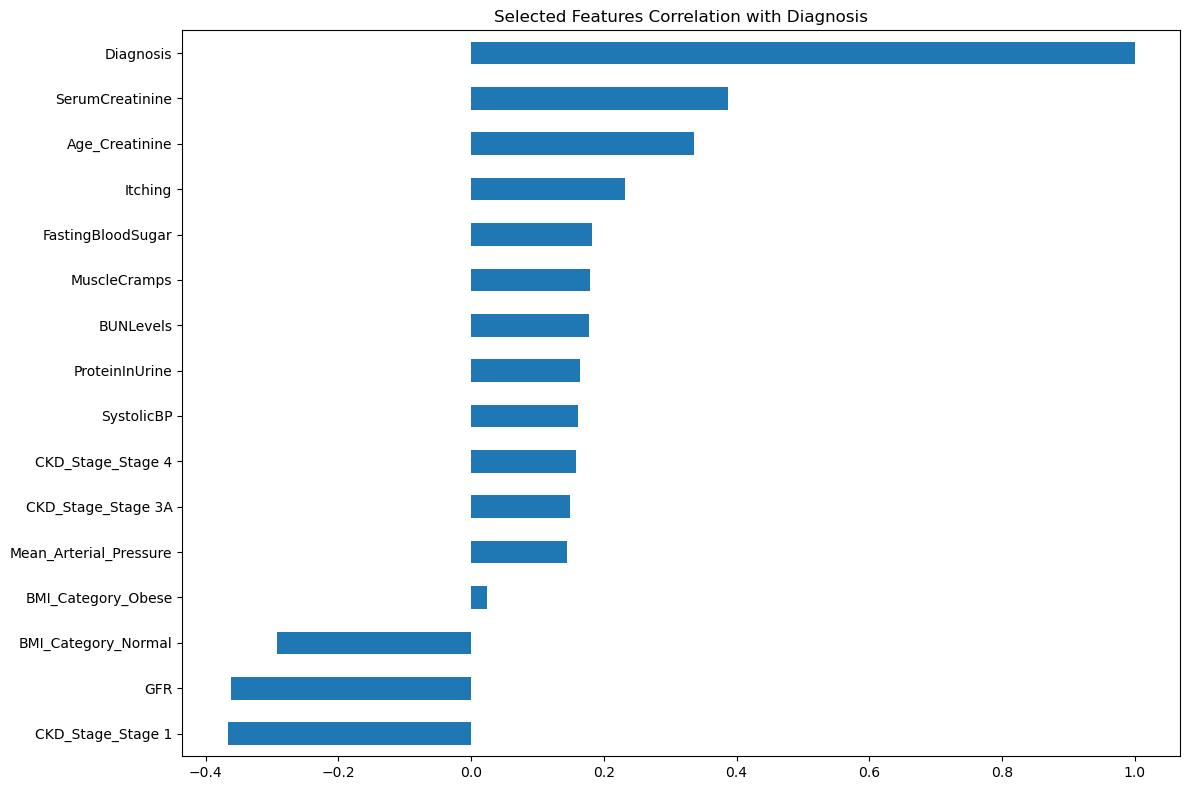

In [35]:
def pkd(df, target_col='Diagnosis'):
    y = df[target_col]
    X = df.drop(target_col, axis=1)
    X2 = ef(X)
    XC = ho(X2)
    cc = XC.select_dtypes(include=['object', 'category']).columns
    nc = XC.select_dtypes(include=['int64', 'float64']).columns
    if len(cc) > 0:
        XE= pd.get_dummies(XC, columns=cc, drop_first=True)
    else:
        X_encoded = XC
    scaler = StandardScaler()
    XS= XE.copy()
    XS[nc] = scaler.fit_transform(XE[nc])
    nf = min(15, XS.shape[1])
    selected_features = sf(XS, y, method='correlation', k=nf)
    X_selected = XS[selected_features]
    print(f"\nSelected {len(selected_features)} features: {selected_features}")
    cd = y.value_counts(normalize=True)
    imbalanced = any(cd < 0.3)
    if imbalanced:
        print("\nDetected class imbalance, apply SMOTE...")
        try:
            smote = SMOTE(random_state=42)
            X_balanced, y_balanced = smote.fit_resample(X_selected, y)
            print(f"Balanced dataset shape: {X_balanced.shape}")
        except ValueError:
            print("SMOTE could not be applied")
            X_balanced, y_balanced = X_selected, y
    else:
        X_balanced, y_balanced = X_selected, y
    return X_balanced, y_balanced, selected_features
X_preprocessed, y_preprocessed, selected_features = pkd(df)
result_df = pd.concat([X_preprocessed, y_preprocessed], axis=1)
plt.figure(figsize=(12, 8))
corr_with_target = result_df[selected_features + ['Diagnosis']].corr()['Diagnosis'].sort_values()
corr_with_target.plot(kind='barh')
plt.title('Selected Features Correlation with Diagnosis')
plt.tight_layout()
plt.show()

Direct Kidney Function Indicators:
SerumCreatinine: A key blood marker for kidney function
GFR: Glomerular Filtration Rate - the gold standard measure of kidney function used for catefories
BUNLevels: Blood Urea Nitrogen - kidney function marker
ProteinInUrine: kidney damage sign 

CKD Staging Information: (GFR categories created)
CKD_Stage_Stage 1: Early kidney disease (GFR > 90 with signs of kidney damage)
CKD_Stage_Stage 3A: Moderate kidney disease (GFR 45-59)
CKD_Stage_Stage 4: Severe kidney disease (GFR 15-29)

Cardiovascular/Metabolic Measures:
SystolicBP: Upper blood pressure reading
Mean_Arterial_Pressure: average blood pressure during cardiac cycle
FastingBloodSugar: Important for diabetes assessment -huge kidney disease risk 

Body Composition Categories: (prior categories created)
BMI_Category_Normal: BMI between 18.5-25
BMI_Category_Obese: BMI over 30

Symptom Indicators:
Itching: can be common in advanced kidney disease
MuscleCramps: can be seen in electrolyte imbalances from kidney dysfunction

Feature Interaction:
Age_Creatinine: combine age and creatine

Positive correlations would indicate features that are associated with a higher likelihood of kidney disease:
- SerumCreatinine and Age_Creatinine have strong positive correlations (~0.4), meaning higher values are strongly associated with kidney disease diagnosis
- Itching, FastingBloodSugar, MuscleCramps, BUNLevels, ProteinInUrine all show positive correlations (~0.2-0.3)
- SystolicBP, CKD_Stage_Stage 4, CKD_Stage_Stage 3A, and Mean_Arterial_Pressure also show positive correlations
- BMI_Category_Obese shows a very slight positive correlation


Negative correlations would indicate features that are associated with a lower likelihood of kidney disease:
- GFR has a strong negative correlation (~-0.25), meaning higher GFR values are associated with no kidney disease (which makes clinical sense)
- CKD_Stage_Stage 1 has a similar negative correlation, indicating early stage kidney disease is negatively correlated with a positive diagnosis
- BMI_Category_Normal is negatively correlated, suggesting normal BMI is associated with a lower chance of kidney disease

Shria: logistic regression and risk score 

In [36]:
## Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support, classification_report
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from IPython.display import display

In [38]:
df.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1


In [39]:
target = "Diagnosis"

features = [
    "SerumCreatinine", "GFR", "BUNLevels", "ProteinInUrine", "ACR", "HemoglobinLevels",
    "FastingBloodSugar", "FamilyHistoryKidneyDisease", "BMI", "Edema",
    "Smoking", "AlcoholConsumption", "DietQuality", "WaterQuality", "MedicationAdherence",
    "DiastolicBP",
]

X = df[features]
y = df[target]

In [40]:
# standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# convert X_train back to DataFrame after splitting
X_train = pd.DataFrame(X_train, columns=X.columns)  # Ensure feature names are retained
X_test = pd.DataFrame(X_test, columns=X.columns)

In [41]:
# Logistic Regression
log_reg = LogisticRegression(class_weight="balanced", max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)  # Ensure model is trained

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

In [42]:
# predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# compute metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.78      0.33        27
           1       0.97      0.74      0.84       305

    accuracy                           0.74       332
   macro avg       0.59      0.76      0.58       332
weighted avg       0.91      0.74      0.80       332

Accuracy: 0.7410
ROC-AUC Score: 0.8077
Precision: 0.9740
Recall: 0.7377
F1 Score: 0.8396


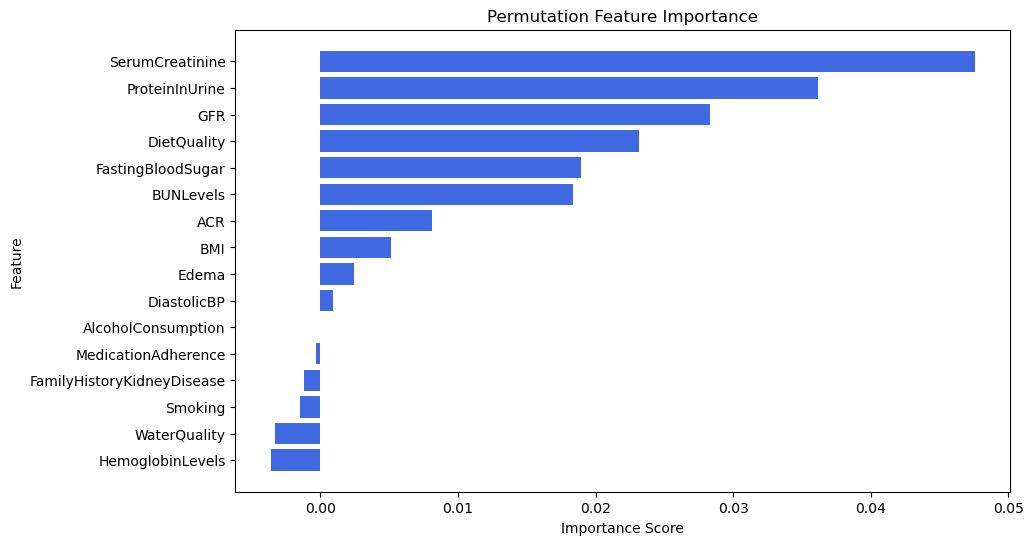

In [43]:
# Get permutation importance
perm_importance = permutation_importance(log_reg, X_test, y_test, n_repeats=10, random_state=42)

# Create DF for importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

Risk Score System (Normalized Weights):
                       Feature  Risk Weight
0              SerumCreatinine     2.383974
3               ProteinInUrine     1.634126
1                          GFR     1.121072
12                 DietQuality     0.785614
6            FastingBloodSugar     0.509354
2                    BUNLevels     0.469888
4                          ACR    -0.201028
8                          BMI    -0.398357
9                        Edema    -0.575952
15                 DiastolicBP    -0.674616
11          AlcoholConsumption    -0.733815
14         MedicationAdherence    -0.753548
7   FamilyHistoryKidneyDisease    -0.812746
10                     Smoking    -0.832479
13                WaterQuality    -0.950876
5             HemoglobinLevels    -0.970609


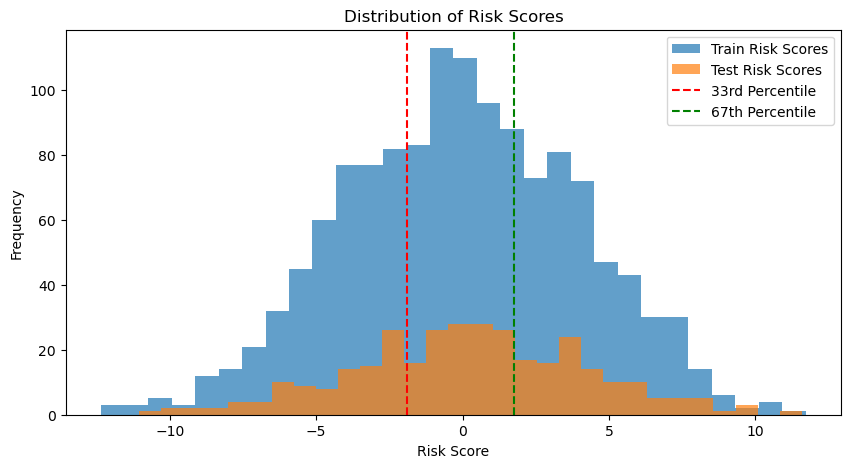

,Risk Score,Risk Probability,Actual CKD
0,4.843441,0.992182,1
1,-2.361223,0.086178,0
2,1.494858,0.816806,1
3,0.789107,0.687640,1
4,1.929939,0.873243,1
...,...,...,...
327,-3.398052,0.032356,1
328,0.922999,0.715653,1
329,1.559011,0.826211,1
330,-3.237798,0.037768,1



Enter new patient data (or type 'exit' to stop):


SerumCreatinine:  0
ProteinInUrine:  3
GFR:  1
DietQuality:  12
FastingBloodSugar:  6
BUNLevels:  2
ACR:  4
BMI:  8
Edema:  9
DiastolicBP:  15
AlcoholConsumption:  11
MedicationAdherence:  14
FamilyHistoryKidneyDisease:  7
Smoking:  10
WaterQuality:  13
HemoglobinLevels:  5



New Patient Risk Assessment:
Risk Score: -33.00
Risk Probability: 0.0000
Risk Level: Low Risk

--- Enter another patient or type 'exit' ---


SerumCreatinine:  4.6
ProteinInUrine:  3.3
GFR:  4
DietQuality:  15
FastingBloodSugar:  7.6
BUNLevels:  8
ACR:  5
BMI:  33
Edema:  12
DiastolicBP:  22
AlcoholConsumption:  12
MedicationAdherence:  14
FamilyHistoryKidneyDisease:  8
Smoking:  10
WaterQuality:  10
HemoglobinLevels:  11



New Patient Risk Assessment:
Risk Score: -48.40
Risk Probability: 0.0000
Risk Level: Low Risk

--- Enter another patient or type 'exit' ---


SerumCreatinine:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


ProteinInUrine:  'exit'


Invalid input. Please enter a numeric value.


GFR:  


Invalid input. Please enter a numeric value.


DietQuality:  'exit'


Invalid input. Please enter a numeric value.


FastingBloodSugar:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


BUNLevels:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


ACR:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


BMI:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


Edema:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


DiastolicBP:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


AlcoholConsumption:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


MedicationAdherence:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


FamilyHistoryKidneyDisease:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


Smoking:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


WaterQuality:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


HemoglobinLevels:  exit


Exiting patient risk assessment...
Invalid input. Please enter a numeric value.


ValueError: shapes (1,0) and (16,) not aligned: 0 (dim 1) != 16 (dim 0)

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

importance_scores = perm_importance.importances_mean 

# Z-score normalization
scaler = StandardScaler()
risk_weights = scaler.fit_transform(importance_scores.reshape(-1, 1)).flatten()

# df for risk weights
risk_score_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Risk Weight': risk_weights
}).sort_values(by='Risk Weight', ascending=False)

print("Risk Score System (Normalized Weights):")
print(risk_score_df)

def calculate_risk_score(X):
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy(dtype=np.float64)
    return np.dot(X, risk_weights)
    
train_risk_scores = calculate_risk_score(X_train)
test_risk_scores = calculate_risk_score(X_test)

plt.figure(figsize=(10, 5))
plt.hist(train_risk_scores, bins=30, alpha=0.7, label="Train Risk Scores")
plt.hist(test_risk_scores, bins=30, alpha=0.7, label="Test Risk Scores")
plt.axvline(np.percentile(train_risk_scores, 33), color='r', linestyle='dashed', label="33rd Percentile")
plt.axvline(np.percentile(train_risk_scores, 67), color='g', linestyle='dashed', label="67th Percentile")
plt.xlabel("Risk Score")
plt.ylabel("Frequency")
plt.title("Distribution of Risk Scores")
plt.legend()
plt.show()

# thresholds based on diagram
low_threshold = np.percentile(train_risk_scores, 33) 
high_threshold = np.percentile(train_risk_scores, 67)

# risk score based on dynamic thresholds seen above
def classify_risk_level(risk_score): 
    if risk_score >= high_threshold:
        return "High Risk"
    elif risk_score <= low_threshold:
        return "Low Risk"
    else:
        return "Moderate Risk"

# risk probabilities 
def logistic_function(x):
    x = np.array(x, dtype=np.float64)
    return 1 / (1 + np.exp(-x))

test_risk_probabilities = logistic_function(test_risk_scores)

# adding risk score and probability to test set
test_results = pd.DataFrame({
    'Risk Score': test_risk_scores,
    'Risk Probability': test_risk_probabilities,
    'Actual CKD': y_test.values 
})

from IPython.display import display
display(test_results)

# input loop
print("\nEnter new patient data (or type 'exit' to stop):")
while True:
    patient_data = {}
    
    for feature in risk_score_df['Feature']:
        value = input(f"{feature}: ")

        if value.lower() == 'exit':
            print("Exiting patient risk assessment...")
            exit()

        try:
            patient_data[feature] = float(value)
        except ValueError:
            print("Invalid input. Please enter a numeric value.")
            continue

    # patient input DF
    patient_df = pd.DataFrame([patient_data])

    patient_risk_score = calculate_risk_score(patient_df)
    patient_risk_probability = logistic_function(patient_risk_score)

    risk_level = classify_risk_level(patient_risk_score)

    print("\nNew Patient Risk Assessment:")
    print(f"Risk Score: {patient_risk_score[0]:.2f}")
    print(f"Risk Probability: {patient_risk_probability[0]:.4f}")
    print(f"Risk Level: {risk_level}")

    print("\n--- Enter another patient or type 'exit' ---")

Risk Score System (Normalized Weights):
                       Feature  Risk Weight
0              SerumCreatinine     2.383974
3               ProteinInUrine     1.634126
1                          GFR     1.121072
12                 DietQuality     0.785614
6            FastingBloodSugar     0.509354
2                    BUNLevels     0.469888
4                          ACR    -0.201028
8                          BMI    -0.398357
9                        Edema    -0.575952
15                 DiastolicBP    -0.674616
11          AlcoholConsumption    -0.733815
14         MedicationAdherence    -0.753548
7   FamilyHistoryKidneyDisease    -0.812746
10                     Smoking    -0.832479
13                WaterQuality    -0.950876
5             HemoglobinLevels    -0.970609


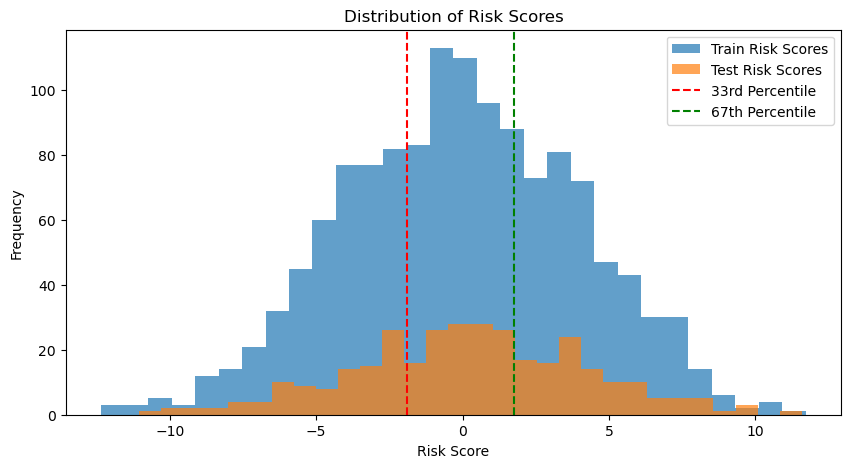

Min Risk Score: -11.04243773063159
Max Risk Score: 11.58930540589069
Mean Risk Score: 0.20195399201286374
Percentiles: 0.25   -2.455345
0.50    0.244718
0.75    2.912321
Name: Risk Score, dtype: float64


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

importance_scores = perm_importance.importances_mean 

# Z-score normalization
scaler = StandardScaler()
risk_weights = scaler.fit_transform(importance_scores.reshape(-1, 1)).flatten()

# df for risk weights
risk_score_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Risk Weight': risk_weights
}).sort_values(by='Risk Weight', ascending=False)

print("Risk Score System (Normalized Weights):")
print(risk_score_df)

def calculate_risk_score(X):
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy(dtype=np.float64)
    return np.dot(X, risk_weights)
    
train_risk_scores = calculate_risk_score(X_train)
test_risk_scores = calculate_risk_score(X_test)

plt.figure(figsize=(10, 5))
plt.hist(train_risk_scores, bins=30, alpha=0.7, label="Train Risk Scores")
plt.hist(test_risk_scores, bins=30, alpha=0.7, label="Test Risk Scores")
plt.axvline(np.percentile(train_risk_scores, 33), color='r', linestyle='dashed', label="33rd Percentile")
plt.axvline(np.percentile(train_risk_scores, 67), color='g', linestyle='dashed', label="67th Percentile")
plt.xlabel("Risk Score")
plt.ylabel("Frequency")
plt.title("Distribution of Risk Scores")
plt.legend()
plt.show()

# thresholds based on diagram
low_threshold = np.percentile(train_risk_scores, 33) 
high_threshold = np.percentile(train_risk_scores, 67)

# risk score based on dynamic thresholds seen above
def classify_risk_level(risk_score): 
    if risk_score >= high_threshold:
        return "High Risk"
    elif risk_score <= low_threshold:
        return "Low Risk"
    else:
        return "Moderate Risk"

# risk probabilities 
def logistic_function(x):
    x = np.array(x, dtype=np.float64)
    return 1 / (1 + np.exp(-x))

test_risk_probabilities = logistic_function(test_risk_scores)

# adding risk score and probability to test set
test_results = pd.DataFrame({
    'Risk Score': test_risk_scores,
    'Risk Probability': test_risk_probabilities,
    'Actual CKD': y_test.values 
})
print("Min Risk Score:", test_results["Risk Score"].min())
print("Max Risk Score:", test_results["Risk Score"].max())
print("Mean Risk Score:", test_results["Risk Score"].mean())
print("Percentiles:", test_results["Risk Score"].quantile([0.25, 0.5, 0.75]))

Sena: Random Forest Model

In [1]:
# Core libraries for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve

# For visualization of results
import matplotlib.pyplot as plt
import seaborn as sns

# For data manipulation
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("/Users/Charlotte/Downloads/balanced_ckd_dataset.csv")

In [3]:
# Check the original data dimensions
print("Original dataframe shape:", df.shape)

# Make sure X and y are properly defined before splitting
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

print("X shape:", X.shape)
print("y shape:", y.shape)

Original dataframe shape: (3048, 16)
X shape: (3048, 15)
y shape: (3048,)


In [4]:
# Check first few rows to verify the data
print(df.head())

   SerumCreatinine       GFR  Age_Creatinine  CKD_Stage_Stage 1   Itching  \
0         1.677841 -0.703221        2.153159                  0  0.868676   
1         0.306508 -0.367645       -0.444441                  0  0.618802   
2         0.717693  0.024294        1.554345                  0 -1.010611   
3         0.087540 -1.119330       -0.365906                  0  0.702294   
4         0.920190 -0.349850        0.225171                  0 -0.521515   

   FastingBloodSugar  MuscleCramps  BUNLevels  ProteinInUrine  \
0          -1.642006      0.490246  -0.154027       -1.206656   
1          -0.866725     -0.653308   0.293655        0.385425   
2           0.778617      1.205499   0.949690       -0.921780   
3           1.531439     -0.666063  -0.437137        0.863983   
4          -1.378111      1.617107  -1.199745        0.053308   

   CKD_Stage_Stage 4  CKD_Stage_Stage 3A  BMI_Category_Normal  SystolicBP  \
0                  0                   1                    0   -0.83

In [5]:
df

,SerumCreatinine,GFR,Age_Creatinine,CKD_Stage_Stage 1,Itching,FastingBloodSugar,MuscleCramps,BUNLevels,ProteinInUrine,CKD_Stage_Stage 4,CKD_Stage_Stage 3A,BMI_Category_Normal,SystolicBP,Mean_Arterial_Pressure,BMI_Category_Obese,Diagnosis
0,1.677841,-0.703221,2.153159,0,0.868676,-1.642006,0.490246,-0.154027,-1.206656,0,1,0,-0.830450,-0.795735,1,1
1,0.306508,-0.367645,-0.444441,0,0.618802,-0.866725,-0.653308,0.293655,0.385425,0,1,0,-0.558711,-1.380502,0,1
2,0.717693,0.024294,1.554345,0,-1.010611,0.778617,1.205499,0.949690,-0.921780,0,0,0,0.489425,1.075521,1,1
3,0.087540,-1.119330,-0.365906,0,0.702294,1.531439,-0.666063,-0.437137,0.863983,0,0,0,-0.675170,-1.544237,1,1
4,0.920190,-0.349850,0.225171,0,-0.521515,-1.378111,1.617107,-1.199745,0.053308,0,1,1,-1.412747,-1.941878,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,-0.900103,0.167491,-1.153841,0,-0.895309,0.960567,-1.459896,-1.460751,0.772424,0,0,0,-0.637884,0.420812,0,0
3044,-1.407717,1.242958,-1.043229,1,-0.415660,-0.613011,0.440345,-0.518573,-0.480814,0,0,0,-1.494697,-0.691766,0,0
3045,-1.348111,0.253497,-1.071524,0,-0.909124,1.040409,-1.219864,-1.697737,0.540753,0,0,0,-0.486971,0.289635,0,0
3046,-1.209760,0.556007,-0.730621,0,-1.586735,0.126346,1.303864,-1.162687,-1.116929,0,0,0,-0.440580,-0.326626,0,0


In [6]:
# checking the class distribution
print("\nClass distribution:")
print(df["Diagnosis"].value_counts(normalize=True))


Class distribution:
Diagnosis
1    0.5
0    0.5
Name: proportion, dtype: float64


In [7]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) # stratify=y ensures that the train-test split maintains the same class distribution as your original dataset. i.e if your original data has 91% CKD patients and 8% non-CKD patients, both your training and test sets will maintain this same 90/8 ratio. This is extremely important for imbalanced datasets. Without stratification, you may get unlucky and have too few negative cases in your training or test set

# Verify the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2438, 15)
y_train shape: (2438,)
X_test shape: (610, 15)
y_test shape: (610,)


In [8]:
# Training the Random Forest model using GridSearchCV for the best hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
    'class_weight': ['balanced', None]  # Handling class imbalance
}

# Create a base Random Forest Classifier
rf_base = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_base, 
    param_grid=param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Using accuracy as the default scoring metric
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Provide detailed output during the search
)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END class_weight=balanced, max_depth=None, min_sampl


Model Evaluation:
Accuracy: 0.9459
ROC AUC Score: 0.9875

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       305
           1       0.96      0.93      0.95       305

    accuracy                           0.95       610
   macro avg       0.95      0.95      0.95       610
weighted avg       0.95      0.95      0.95       610



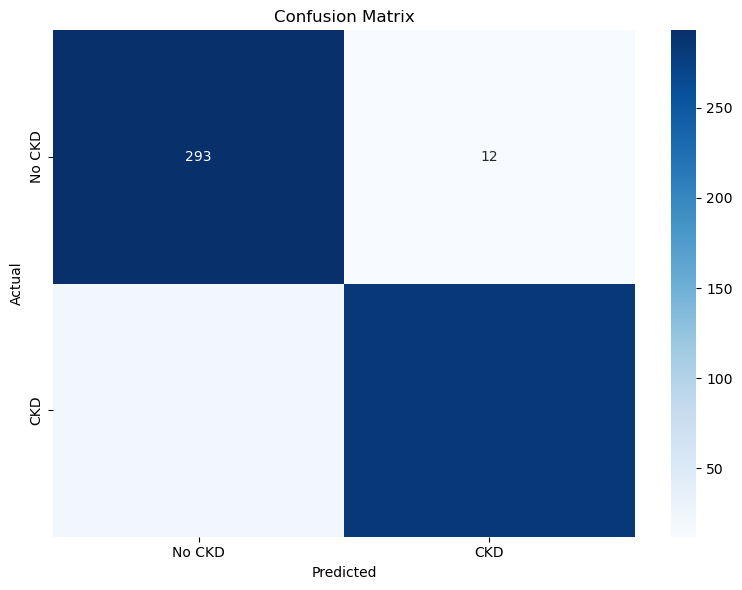

In [10]:
# Evaluating the model and generating a confusion matrix
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the best model
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No CKD', 'CKD'],
            yticklabels=['No CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

Based on these metrics, your model performs exceptionally well in predicting both CKD and no-CKD cases:

Accuracy: 0.9459 (94.59%)

This means the model correctly classifies about 95% of all cases For medical diagnostics, this is considered very good

ROC AUC Score: 0.9875

This is an excellent score, very close to the perfect 1.0 Indicates the model has a strong ability to distinguish between CKD and no-CKD classes

Classification Report:

Precision for no-CKD (class 0): 0.93 Precision for CKD (class 1): 0.96 Recall for no-CKD: 0.96 Recall for CKD: 0.93 F1-scores are balanced at 0.95 for both classes

Key Takeaways:

The model performs almost equally well for both CKD and no-CKD predictions Very balanced performance across different metrics Minimal difference between precision and recall suggests robust classification

Confusion Matrix Breakdown:

Total Samples: 610 (305 No CKD + 305 CKD)

True Negatives (Top Left): 293

293 patients were correctly predicted as NOT having CKD

False Positives (Top Right): 12

12 patients were incorrectly predicted as having CKD when they actually did not

False Negatives (Bottom Left): 21

21 patients were incorrectly predicted as NOT having CKD when they actually did

True Positives (Bottom Right): 284

284 patients were correctly predicted as having CKD

Key Insights:

Model is very good at identifying both CKD and No CKD cases Low number of misclassifications (12 false positives, 21 false negatives) Slightly more accurate in identifying CKD patients (284/305 correct) than No CKD patients (293/305 correct)

In a medical context, these misclassifications have different implications:

False Negatives (21) are more critical as they represent missed CKD diagnoses False Positives (12) might lead to unnecessary further testing

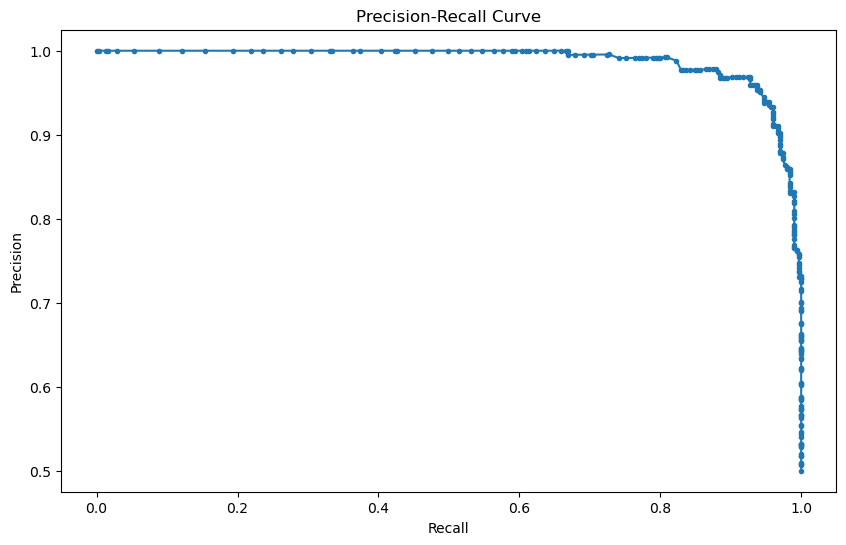

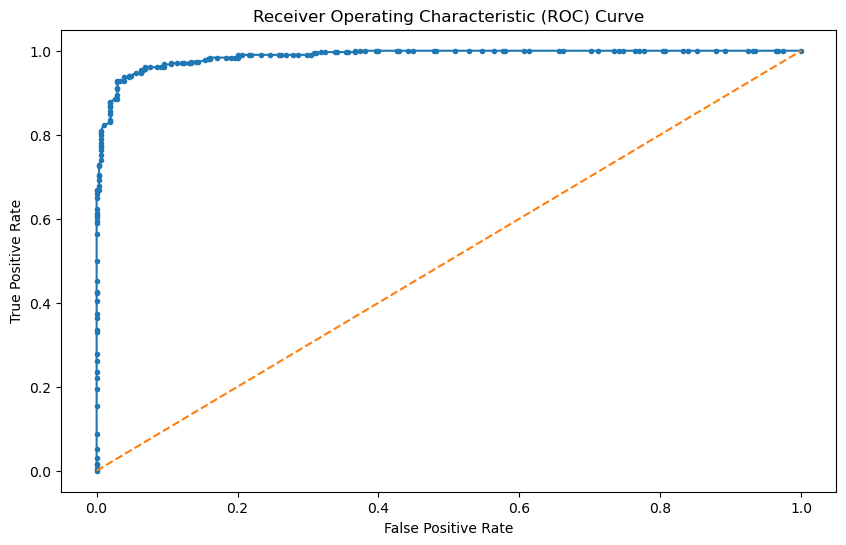

In [11]:
# Visualization and graphs to asses our model

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    precision_recall_curve, 
    roc_curve, 
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)
from sklearn.calibration import calibration_curve

# 1. Precision-Recall Curve
plt.figure(figsize=(10, 6))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# 2. ROC Curve
plt.figure(figsize=(10, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Johnathen: Clustering

Combined CKD Clustering Analysis¶
This notebook merges the K=3 and K=5 analyses to compare clustering performance for CKD risk stratification.

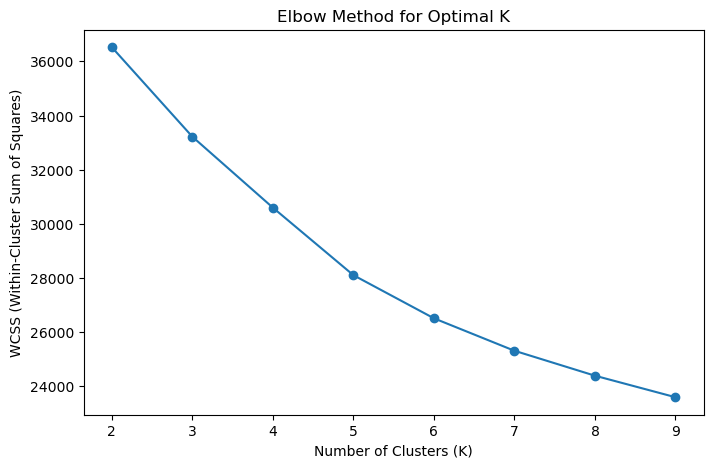

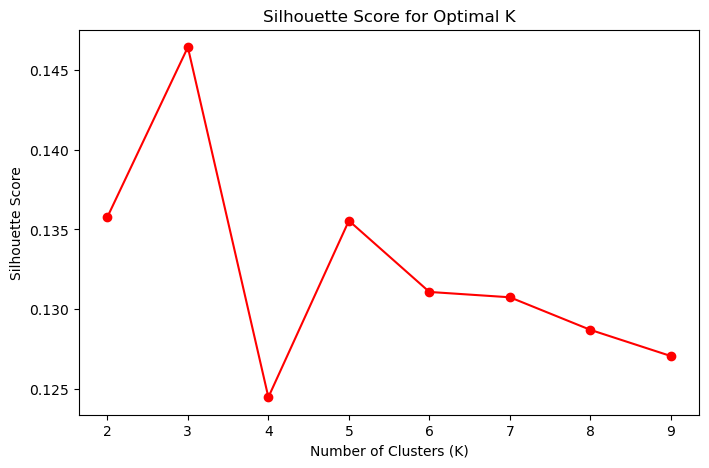

Optimal K based on silhouette score: 3


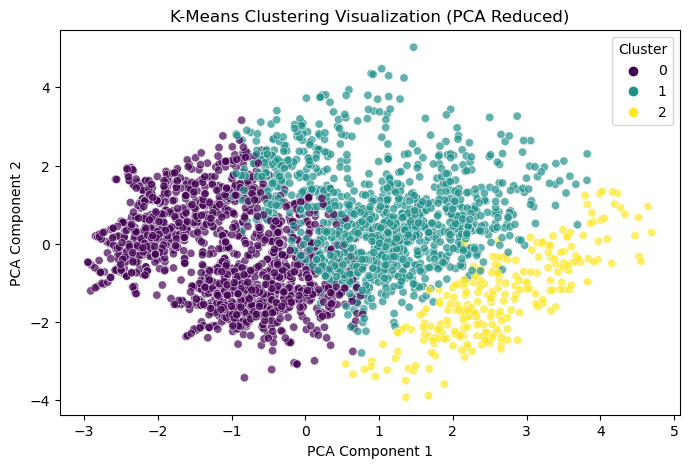

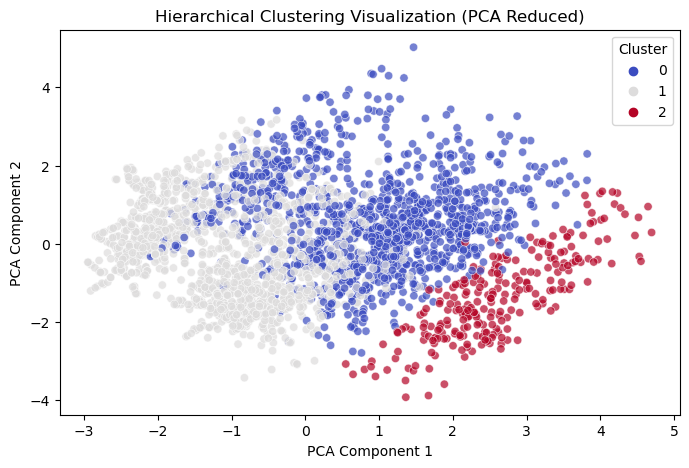

K-Means Cluster Means:
                SerumCreatinine       GFR  Age_Creatinine  CKD_Stage_Stage 1  \
Cluster_KMeans                                                                 
0                     -1.036638  0.685177       -0.842832           0.462485   
1                      0.551247  0.108888        0.487712           0.201365   
2                      0.013127 -1.467603       -0.072024           0.000000   

                 Itching  FastingBloodSugar  MuscleCramps  BUNLevels  \
Cluster_KMeans                                                         
0              -0.359771          -0.176227     -0.305175  -0.277174   
1              -0.013705          -0.124380      0.059304   0.005532   
2               0.114406          -0.050853     -0.030413  -0.013279   

                ProteinInUrine  CKD_Stage_Stage 4  CKD_Stage_Stage 3A  \
Cluster_KMeans                                                          
0                    -0.190537                0.0            0.010455

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


df = pd.read_csv("/Users/Charlotte/Downloads/balanced_ckd_dataset.csv")

# Standardizing numerical features (excluding the target variable 'Diagnosis')
features = df.drop(columns=["Diagnosis"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA to reduce dimensionality for efficiency
pca = PCA(n_components=11) 
reduced_features = pca.fit_transform(scaled_features)

# Finding the optimal number of clusters using the Elbow Method
wcss = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(reduced_features)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(reduced_features, labels))

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.savefig('Elbow best k=3.png')
plt.show()

# Plotting the Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.savefig('Silhouette K=3.png')
plt.show()

# Selecting the best K based on the highest silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal K based on silhouette score: {best_k}")

# Performing K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster_KMeans"] = kmeans.fit_predict(reduced_features)

# Performing Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=best_k)
df["Cluster_Hierarchical"] = hierarchical.fit_predict(reduced_features)

# Applying PCA for visualization (reduce to 2D)
pca_vis = PCA(n_components=2)
pca_features_vis = pca_vis.fit_transform(reduced_features)
df["PCA1"] = pca_features_vis[:, 0]
df["PCA2"] = pca_features_vis[:, 1]

# Visualizing K-Means clustering results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster_KMeans"], palette="viridis", alpha=0.7)
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.savefig('Kmeans K=3 results.png')
plt.show()

# Visualizing Hierarchical clustering results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster_Hierarchical"], palette="coolwarm", alpha=0.7)
plt.title("Hierarchical Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.savefig('Hierarchical k=3 results.png')
plt.show()

# Compute mean feature values for each cluster in K-Means
kmeans_cluster_means = df.groupby("Cluster_KMeans").mean()

# Display cluster means for K-Means
print("K-Means Cluster Means:")
print(kmeans_cluster_means)

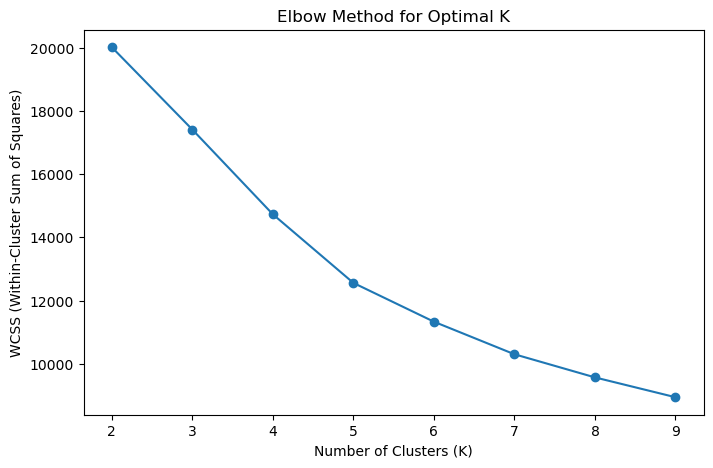

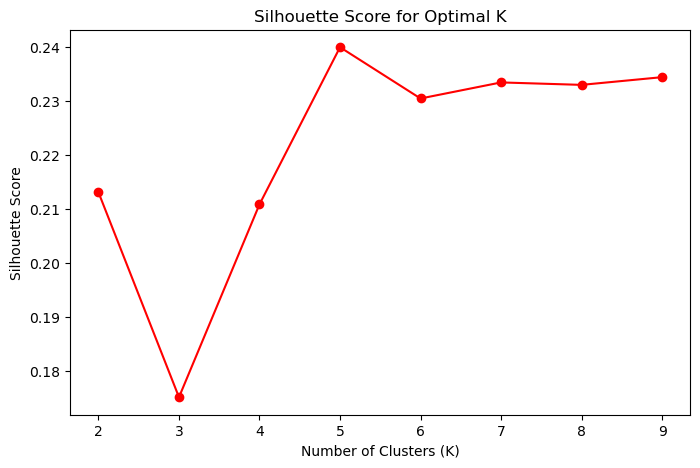

Optimal K based on silhouette score: 5


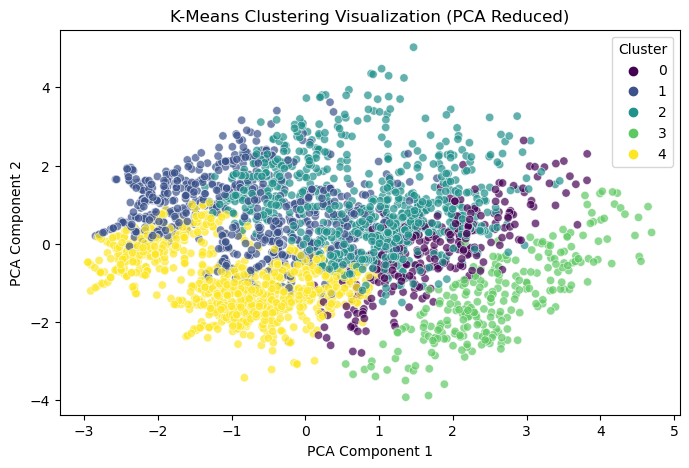

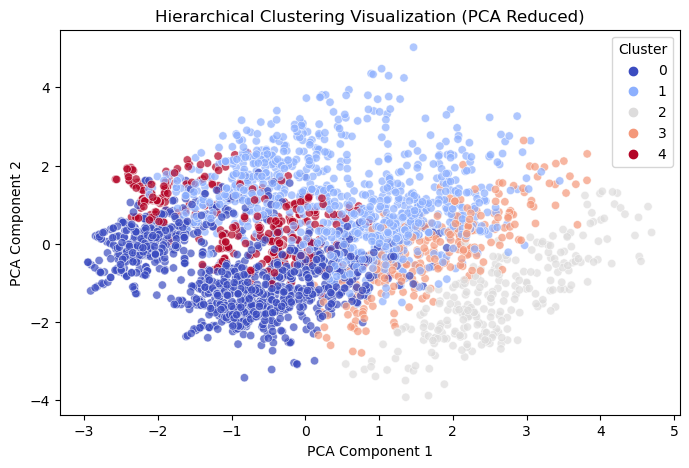

K-Means Cluster Means:
                SerumCreatinine       GFR  Age_Creatinine  CKD_Stage_Stage 1  \
Cluster_KMeans                                                                 
0                     -0.019025 -0.497222       -0.012835           0.000000   
1                     -0.880108  0.732355       -0.711953           0.537167   
2                      0.820011  0.361080        0.725550           0.311721   
3                      0.013127 -1.467603       -0.072024           0.000000   
4                     -1.044771  0.550762       -0.853510           0.348381   

                 Itching  FastingBloodSugar  MuscleCramps  BUNLevels  \
Cluster_KMeans                                                         
0               0.068102          -0.000240      0.039127   0.156911   
1              -0.178660          -0.247123     -0.482566  -0.104986   
2              -0.057555          -0.155617      0.012514  -0.091878   
3               0.114406          -0.050853     -0.03041

In [13]:
# Apply PCA to reduce dimensionality for efficiency
pca = PCA(n_components=5) 
reduced_features = pca.fit_transform(scaled_features)

# Finding the optimal number of clusters using the Elbow Method
wcss = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(reduced_features)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(reduced_features, labels))

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.savefig('Elbow best k=5.png')
plt.show()

# Plotting the Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.savefig('Silhouette K=5.png')
plt.show()

# Selecting the best K based on the highest silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal K based on silhouette score: {best_k}")

# Performing K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster_KMeans"] = kmeans.fit_predict(reduced_features)

# Performing Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=best_k)
df["Cluster_Hierarchical"] = hierarchical.fit_predict(reduced_features)

# Applying PCA for visualization (reduce to 2D)
pca_vis = PCA(n_components=2)
pca_features_vis = pca_vis.fit_transform(reduced_features)
df["PCA1"] = pca_features_vis[:, 0]
df["PCA2"] = pca_features_vis[:, 1]

# Visualizing K-Means clustering results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster_KMeans"], palette="viridis", alpha=0.7)
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.savefig('Kmeans K=5 results.png')
plt.show()

# Visualizing Hierarchical clustering results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster_Hierarchical"], palette="coolwarm", alpha=0.7)
plt.title("Hierarchical Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.savefig('Hierarchical k=5 results.png')
plt.show()

# Compute mean feature values for each cluster in K-Means
kmeans_cluster_means = df.groupby("Cluster_KMeans").mean()

# Display cluster means for K-Means
print("K-Means Cluster Means:")
print(kmeans_cluster_means)

In [14]:
pca.explained_variance_ratio_.cumsum()

array([0.16286648, 0.27869442, 0.38888853, 0.47724629, 0.55147468])

Comparison of K=3 vs. K=5 Clustering¶
K=3 (11 PCA components, 91.3% variance): Better interpretability but lower silhouette score.
K=5 (5 PCA components, 55.1% variance): Higher silhouette score but noisier clusters.